In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import folium
import matplotlib.patches as mpatches
from io import BytesIO
import base64
from branca.colormap import LinearColormap
from geopy.distance import geodesic
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import os

In [ ]:
print(os.getcwd())

/Users/innakonar


In [ ]:
 data= pd.read_csv('./Desktop/PythonScripts/2016_Building_Energy_Benchmarking.csv', sep=',')

In [ ]:
dim=data.shape
print(f"Rows:{dim[0]} Columns:{dim[1]}")

Rows:3376 Columns:46


In [ ]:
 df=data.copy()

In [ ]:
df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType   
0              1      2016  NonResidential               Hotel  \
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode   
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0  \
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)   
0                    0659000030  ...      1.156514e+06         3946027.0  \
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments   
0         12764.52930         1276453.0        False       NaN  \
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
df[df['OSEBuildingID'].duplicated(keep=False)]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

[0 rows x 46 columns]

In [ ]:
####Les variables que nous utiliserons dans notre étude sont les suivantes:Le fichier de données "2016_Building_Energy_Benchmarking.csv" est une base de données sur la consommation énergétique des bâtiments de la ville de Seattle, aux États-Unis, pour l'année 2016. Cette base de données contient des informations sur la consommation d'énergie de différents bâtiments aux États-Unis. Les données ont été collectées en 2016 et comprennent des informations telles que le type de bâtiment, le type de propriété, le nom et l'adresse de la propriété, la ville et l'état, le code postal, l'année de construction, le nombre de bâtiments sur la parcelle, le nombre d'étages, la surface totale du bâtiment en pieds carrés, la consommation d'énergie annuelle par pied carré pour le bâtiment,  et les émissions totales de gaz à effet de serre.

#BuildingType: type de bâtiment (résidentiel ou commercial, par exemple)
#PrimaryPropertyType: type de propriété principal (par exemple, immeuble de bureaux à plusieurs étages)
#LargestPropertyUseType: le type d'utilisation principale des locaux dans le bâtiment de plus grande surface
#YearBuilt: année de construction du bâtiment
#NumberofBuildings: nombre de bâtiments sur la parcelle
#NumberofFloors: nombre d'étages du bâtiment
#PropertyGFATotal: surface totale du bâtiment en pieds carrés
#Neighborhood:la désignation du quartier ou de la zone géographique dans laquelle se situe l'immeuble.
#Latitude
#Longitude

#Electricity(kBtu):l'énergie dépensée en électricité (mesurée en KiloBritish Thermal Units ou kBtu)
#NaturalGas(kBtu):l'énergie dépensée en gaz (mesurée en KiloBritish Thermal Units ou kBtu)
#SteamUse(kBtu):La valeur de l'énergie qui a été utilisée pour chauffer ou refroidir des pièces à l'aide de vapeur en unités de kBtu.
#ENERGYSTARScore: score ENERGY STAR pour le bâtiment
#SiteEnergyUse(kBtu)

# ComplianceStatus:c'est un signe dans les données sur l'efficacité énergétique des bâtiments, 
###qui indique l'état de conformité du bâtiment aux normes et exigences des normes d'efficacité énergétique. 
####Généralement, ce champ contient des valeurs telles que "Compliant", "Non-Compliant" ou "In Violation".
#TotalGHGEmissions: émissions totales de gaz à effet de serre en équivalent tonnes de carbone par an pour le bâtiment.
#GHGEmissionsIntensity:la quantité d'émissions de gaz à effet de serre générées par le bâtiment par unité de surface.


In [ ]:
def calculate_missing_values(df):
    missing_values_percentage =(df.isna().sum()/len(df)*100).sort_values()
    print("\nPercentage of missing values:\n", missing_values_percentage.sort_values())
calculate_missing_values(df)


Percentage of missing values:
 OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ComplianceStatus                     0.000000
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
DefaultData                          0.000000
SiteEnergyUse(kBtu)                  0.148104
Si

<AxesSubplot:>

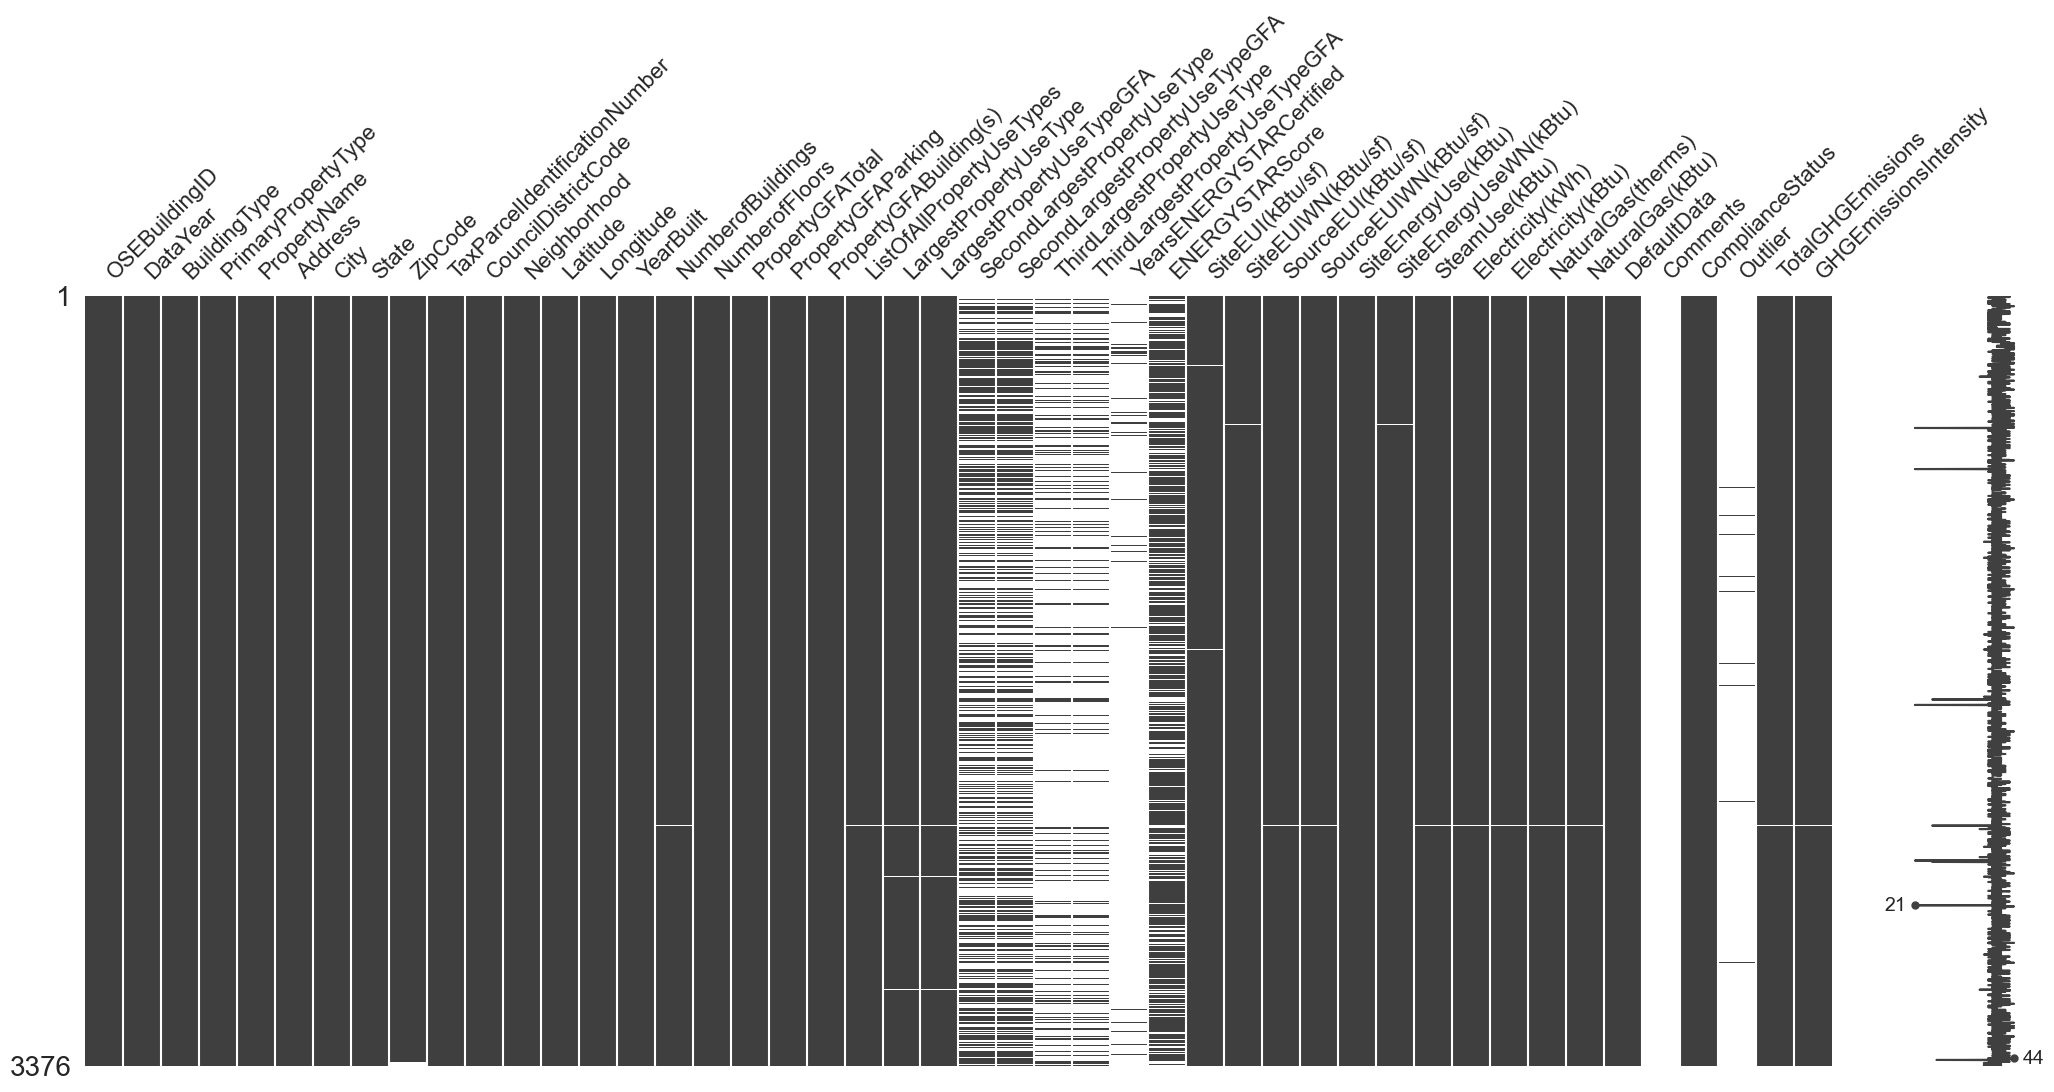

In [ ]:
msno.matrix(df)

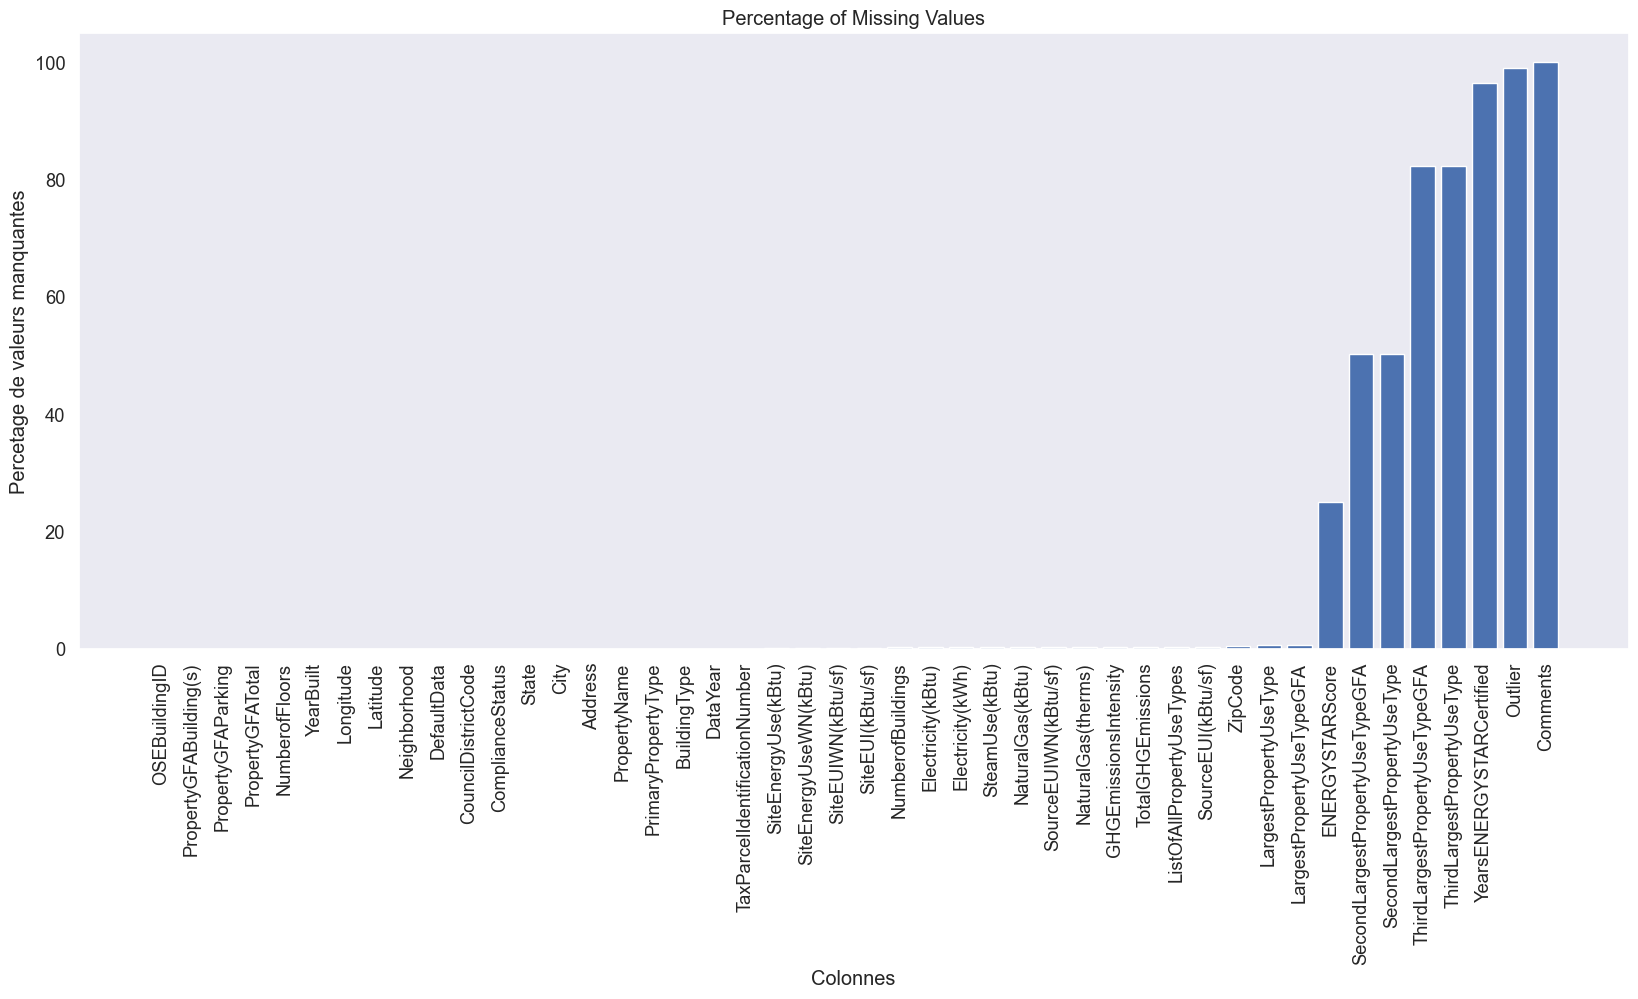

In [ ]:
def plot_missing_values(df):
    na_counts=(df.isna().sum()/len(df)*100).sort_values()
    plt.figure(figsize=(20,8))
    plt.title('Percentage of Missing Values')
    plt.bar(na_counts.index, na_counts)
    plt.xlabel('Colonnes')
    plt.ylabel('Percetage de valeurs manquantes')
    plt.xticks(rotation=90)
    plt.grid()
    plt.savefig("my_plot1.JPEG", bbox_inches="tight")
    plt.show()
    
plot_missing_values(df)

In [ ]:
df = df[~((df['SiteEnergyUse(kBtu)'].isnull()) | (df['TotalGHGEmissions'].isnull()))]

In [ ]:
def df_clean(df, threshold):
    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all')
    row_limit = int(((100 - threshold) / 100) * df.shape[1]+1)
    df = df.dropna(axis=0, thresh=row_limit)
    column_limit = int(((100 - threshold) / 100) * df.shape[0]+1)
    df = df.dropna(axis=1, thresh=column_limit)
    print(df.shape)
    return df

df = df_clean(df, 50)

(3367, 39)


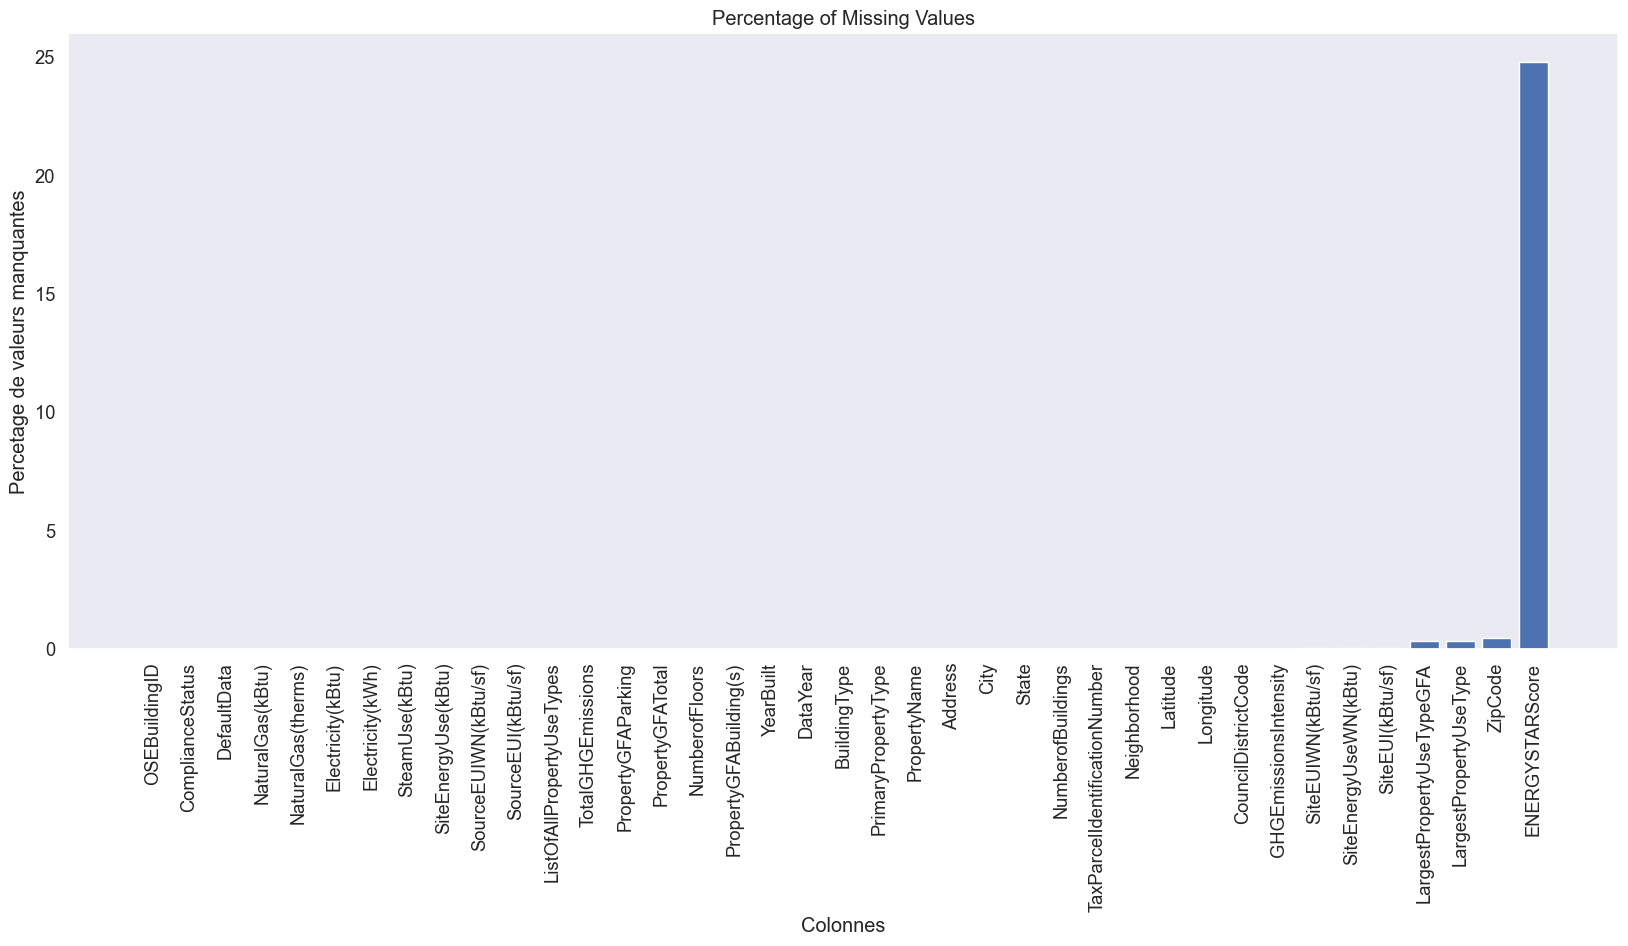

In [ ]:
plot_missing_values(df)

In [ ]:
df = df[df['ZipCode'].notna() & df['ENERGYSTARScore'].notna() & df['LargestPropertyUseType'].notna()
        & df['SiteEUIWN(kBtu/sf)'].notna()].copy()


In [ ]:
df.isna().sum()

OSEBuildingID                    0
DataYear                         0
BuildingType                     0
PrimaryPropertyType              0
PropertyName                     0
Address                          0
City                             0
State                            0
ZipCode                          0
TaxParcelIdentificationNumber    0
CouncilDistrictCode              0
Neighborhood                     0
Latitude                         0
Longitude                        0
YearBuilt                        0
NumberofBuildings                0
NumberofFloors                   0
PropertyGFATotal                 0
PropertyGFAParking               0
PropertyGFABuilding(s)           0
ListOfAllPropertyUseTypes        0
LargestPropertyUseType           0
LargestPropertyUseTypeGFA        0
ENERGYSTARScore                  0
SiteEUI(kBtu/sf)                 0
SiteEUIWN(kBtu/sf)               0
SourceEUI(kBtu/sf)               0
SourceEUIWN(kBtu/sf)             0
SiteEnergyUse(kBtu) 

In [ ]:
address_df=df[['OSEBuildingID','Address', 'City', 'State', 'ZipCode','Latitude', 'Longitude']]

In [ ]:
df=df.drop(['Address', 'City', 'State', 'ZipCode','TaxParcelIdentificationNumber', 'CouncilDistrictCode',
         'Electricity(kWh)', 'NaturalGas(therms)', 'DataYear','PropertyName','DefaultData',
            'LargestPropertyUseTypeGFA'],axis=1)

In [ ]:
dim=df.shape
print(f"Rows:{dim[0]} Columns:{dim[1]}")

Rows:2522 Columns:27


In [ ]:
# Analyse Exploratoire
#Nous allons à present effectuer une analyse exploratoire sur les indicateurs. Nous commençons par les deux variable à predire. Ce sont

#SiteEnergyUse(kBtu)
#TotalGHGEmissions

In [ ]:
df['BuildingType'].unique()

array(['NonResidential', 'Multifamily MR (5-9)', 'SPS-District K-12',
       'Campus', 'Multifamily LR (1-4)', 'Nonresidential COS',
       'Multifamily HR (10+)'], dtype=object)

In [ ]:
df.groupby('BuildingType').size()


BuildingType
Campus                    5
Multifamily HR (10+)     95
Multifamily LR (1-4)    867
Multifamily MR (5-9)    472
NonResidential          992
Nonresidential COS        8
SPS-District K-12        83
dtype: int64

In [ ]:
nonresidential_buildings = ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus']
df = df[df['BuildingType'].isin(nonresidential_buildings)]
df

OSEBuildingID        BuildingType          PrimaryPropertyType   
0                 1      NonResidential                        Hotel  \
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
3329          50054  Nonresidential COS                 Large Office   
3337          50062      NonResidential                        Hotel   
3338          50068      NonResidential                    Warehouse   
3339          50069      NonResidential  Small- and Mid-Sized Office   
3347          50081      NonResidential                  K-12 School   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings   
0             DOWNTOWN  47.61220 -122.33799       1927                1.0  \
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3329        LAKE UNION  47.62251 -122.33390       2014                1.0   
3337        LAKE UNION  47.65476 -122.34732       2014                1.0   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   

      NumberofFloors  PropertyGFATotal  ...  SourceEUI(kBtu/sf)   
0                 12             88434  ...          182.500000  \
1                 11            103566  ...          176.100006   
2                 41            956110  ...          241.899994   
3                 10             61320  ...          216.199997   
4                 18            175580  ...          211.399994   
...              ...               ...  ...                 ...   
3329              13            536697  ...           99.199997   
3337               4            126823  ...          169.500000   
3338               1             52085  ...          102.099998   
3339               2             24990  ...          367.000000   
3347               3             45000  ...           91.099998   

      SourceEUIWN(kBtu/sf) SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu)   
0               189.000000          7226362.50          7.456910e+06  \
1               179.399994          8387933.00          8.664479e+06   
2               244.100006         72587024.00          7.393711e+07   
3               224.000000          6794584.00          6.946800e+06   
4               215.600006         14172606.00          1.465650e+07   
...                    ...                 ...                   ...   
3329            101.599998         13239050.00          1.403717e+07   
3337            169.500000          6042399.50          6.042400e+06   
3338            114.599998          3605855.50          4.182622e+06   
3339            378.700012          4420650.50          4.731814e+06   
3347             96.000000          1325972.75          1.397742e+06   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  ComplianceStatus   
0         2003882.00          3946027.0         1276453.0         Compliant  \
1               0.00          3242851.0         5145082.0         Compliant   
2        21566554.00         49526664.0         1493800.0         Compliant   
3         2214446.25          2768924.0         1811213.0         Compliant   
4               0.00          5368607.0         8803998.0         Compliant   
...              ...                ...               ...               

In [ ]:
df.BuildingType.value_counts()

BuildingType
NonResidential        992
SPS-District K-12      83
Nonresidential COS      8
Campus                  5
Name: count, dtype: int64

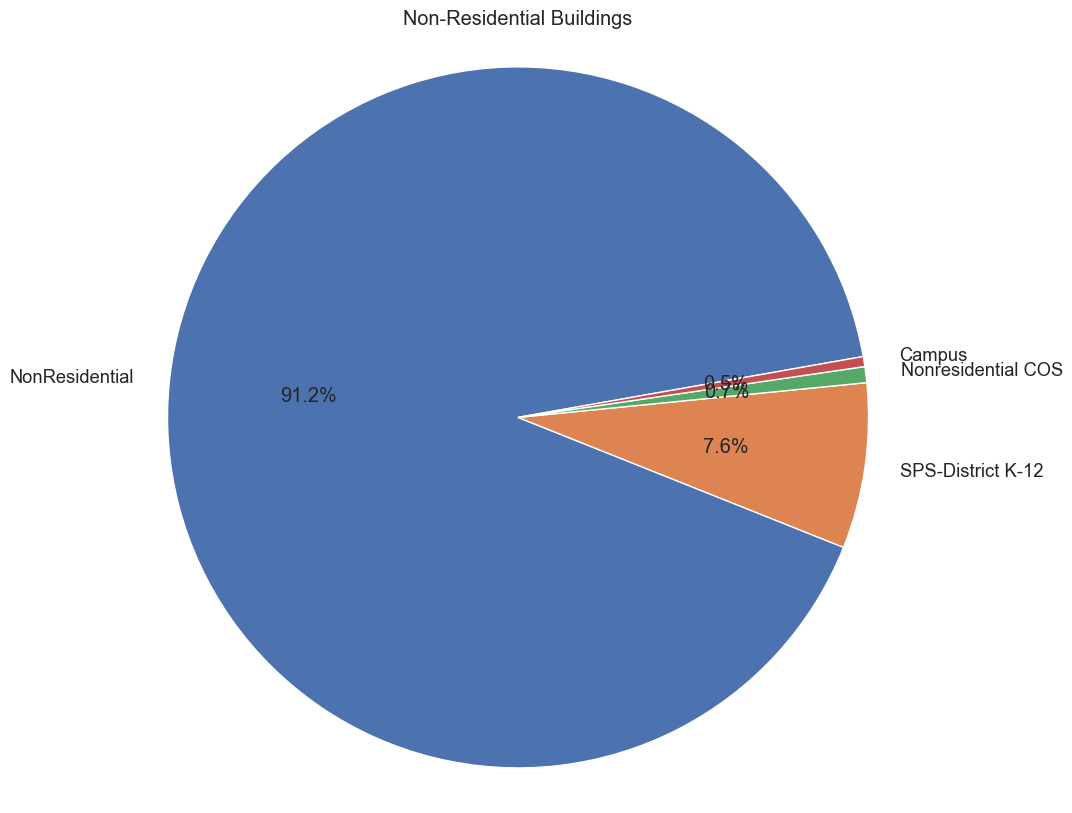

In [ ]:
counts = df['BuildingType'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=10)
ax.axis('equal')
ax.set_title('Non-Residential Buildings')
plt.show()

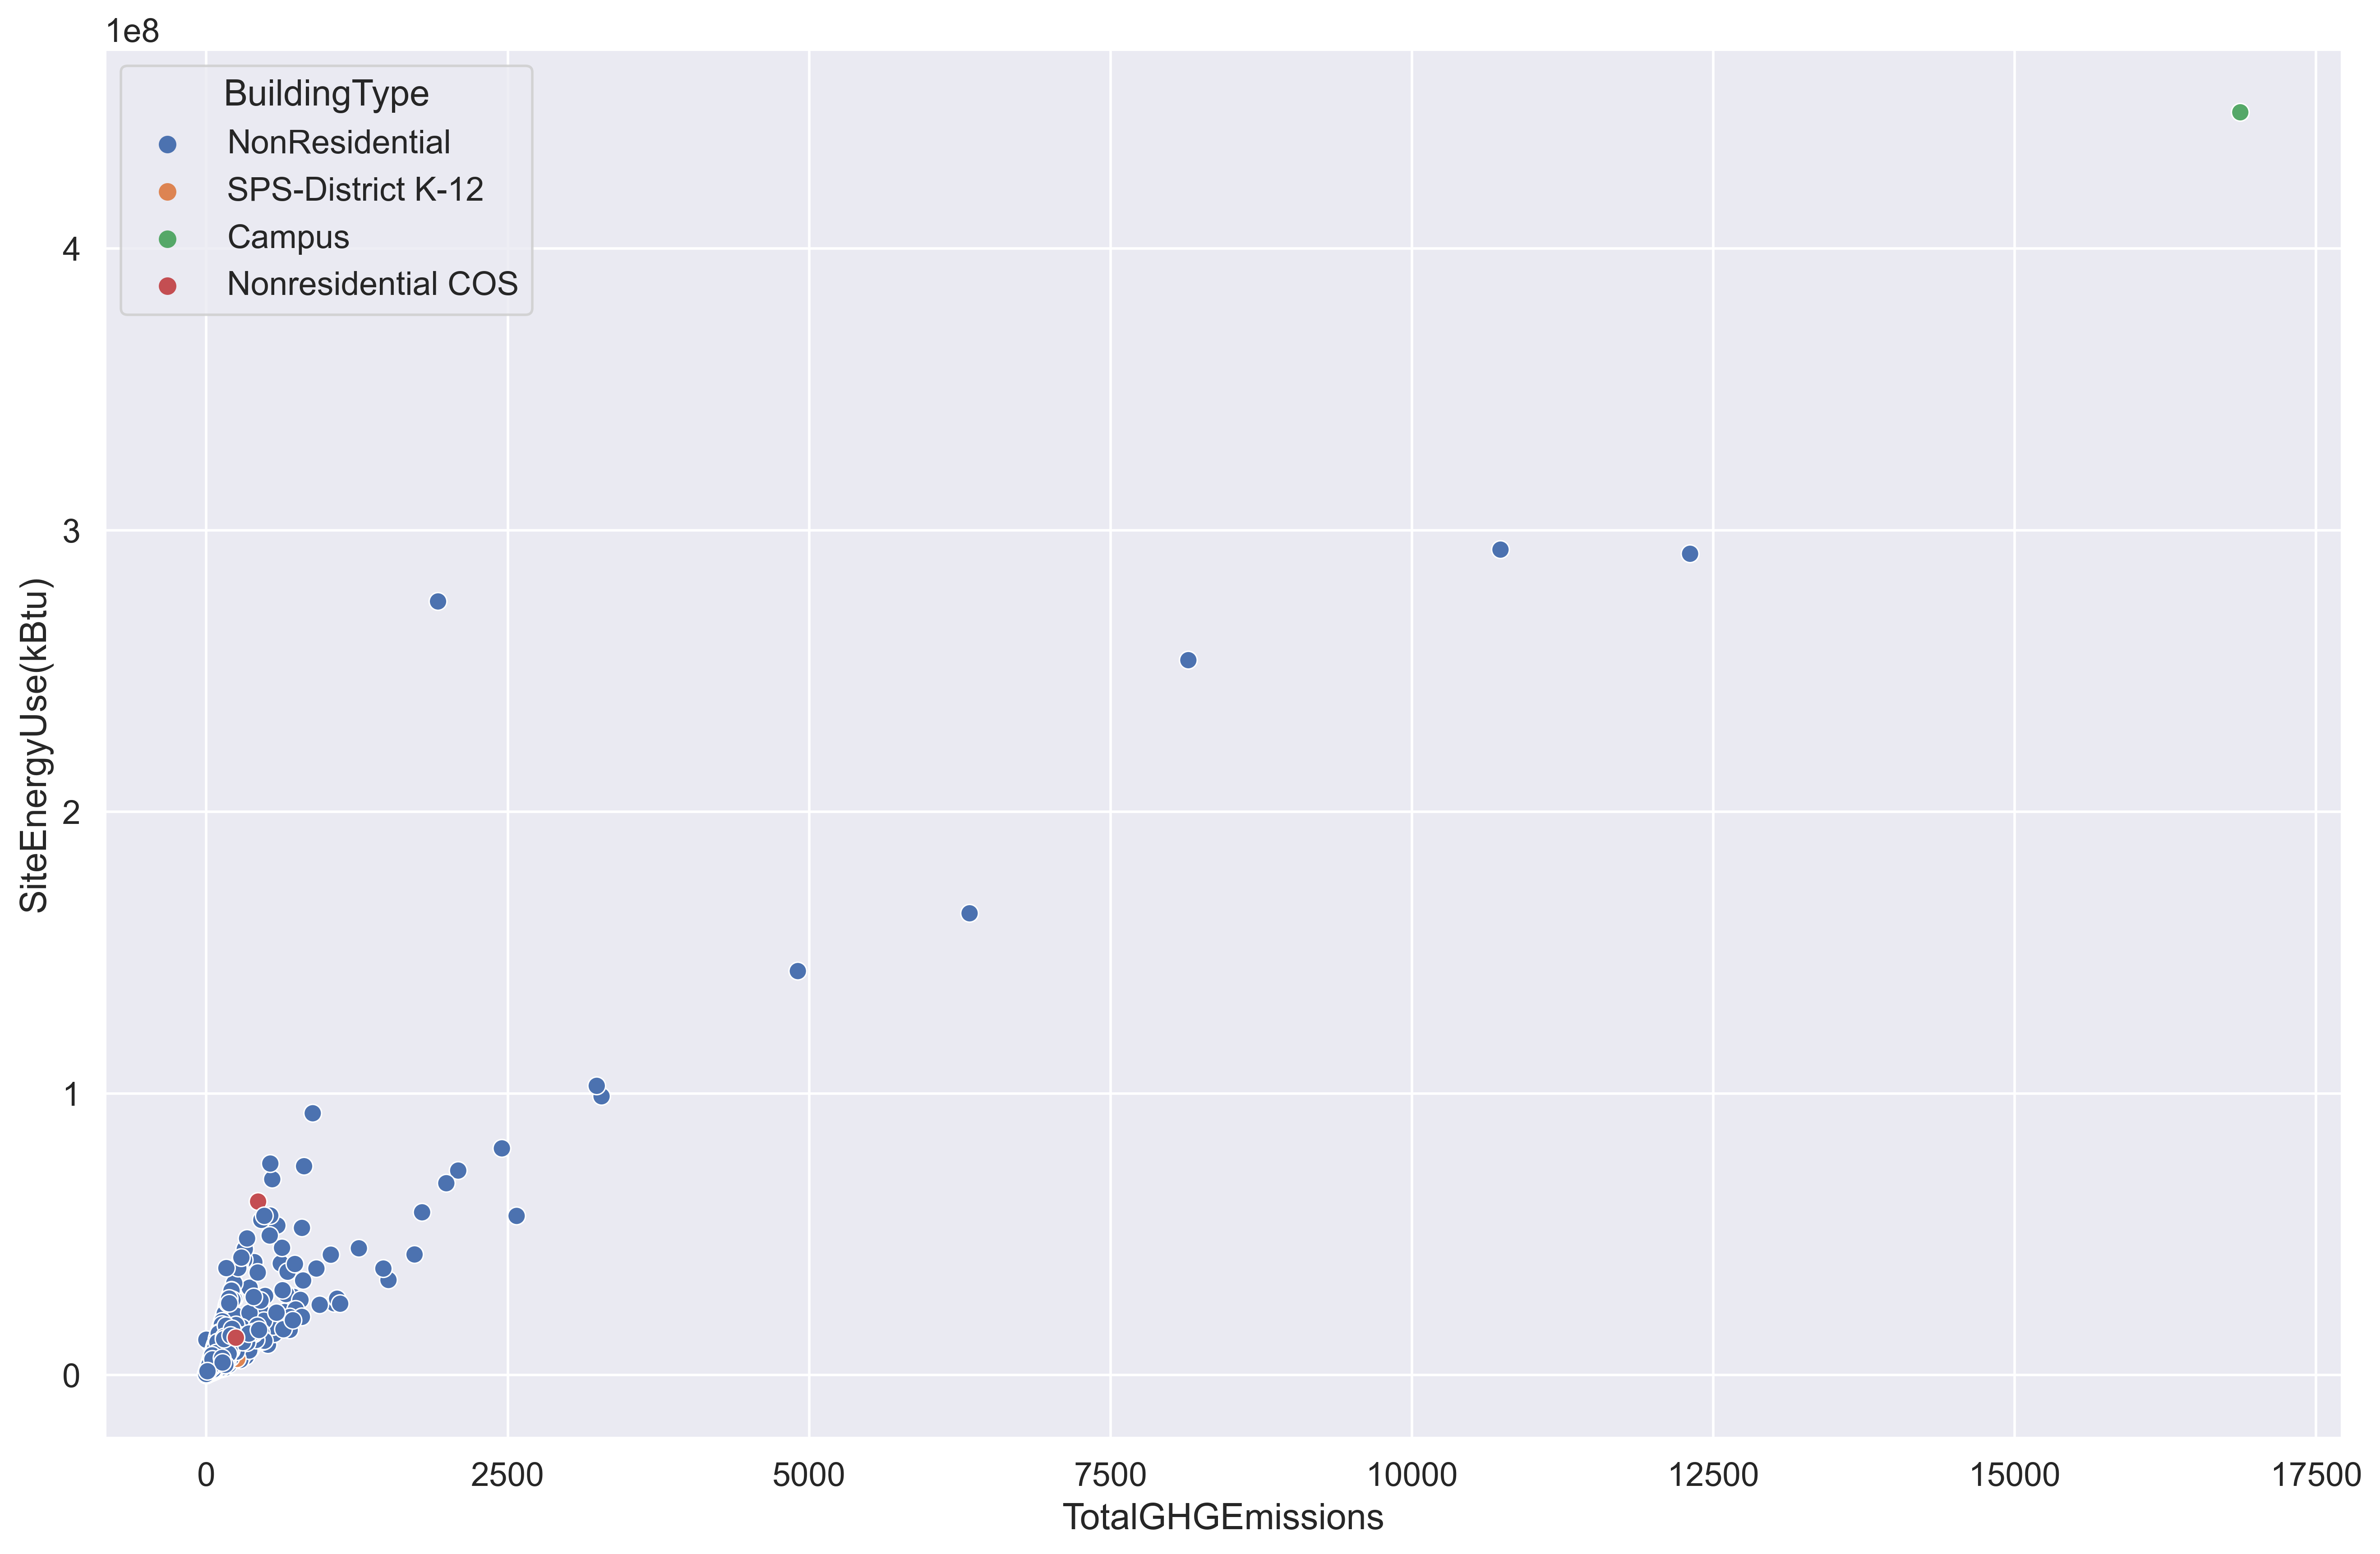

In [ ]:
plt.figure(figsize=(16, 10), dpi=400)
sns.set(font_scale=1.2)
ax = sns.scatterplot(y='SiteEnergyUse(kBtu)',
                     x='TotalGHGEmissions',
                     data=df,
                     s=50,
                     hue='BuildingType')
plt.savefig("my_plot2.JPEG", bbox_inches="tight")
    
plt.show()

In [ ]:
# Sur cette graphique, Nous aperçevons deux outliers (un campus)

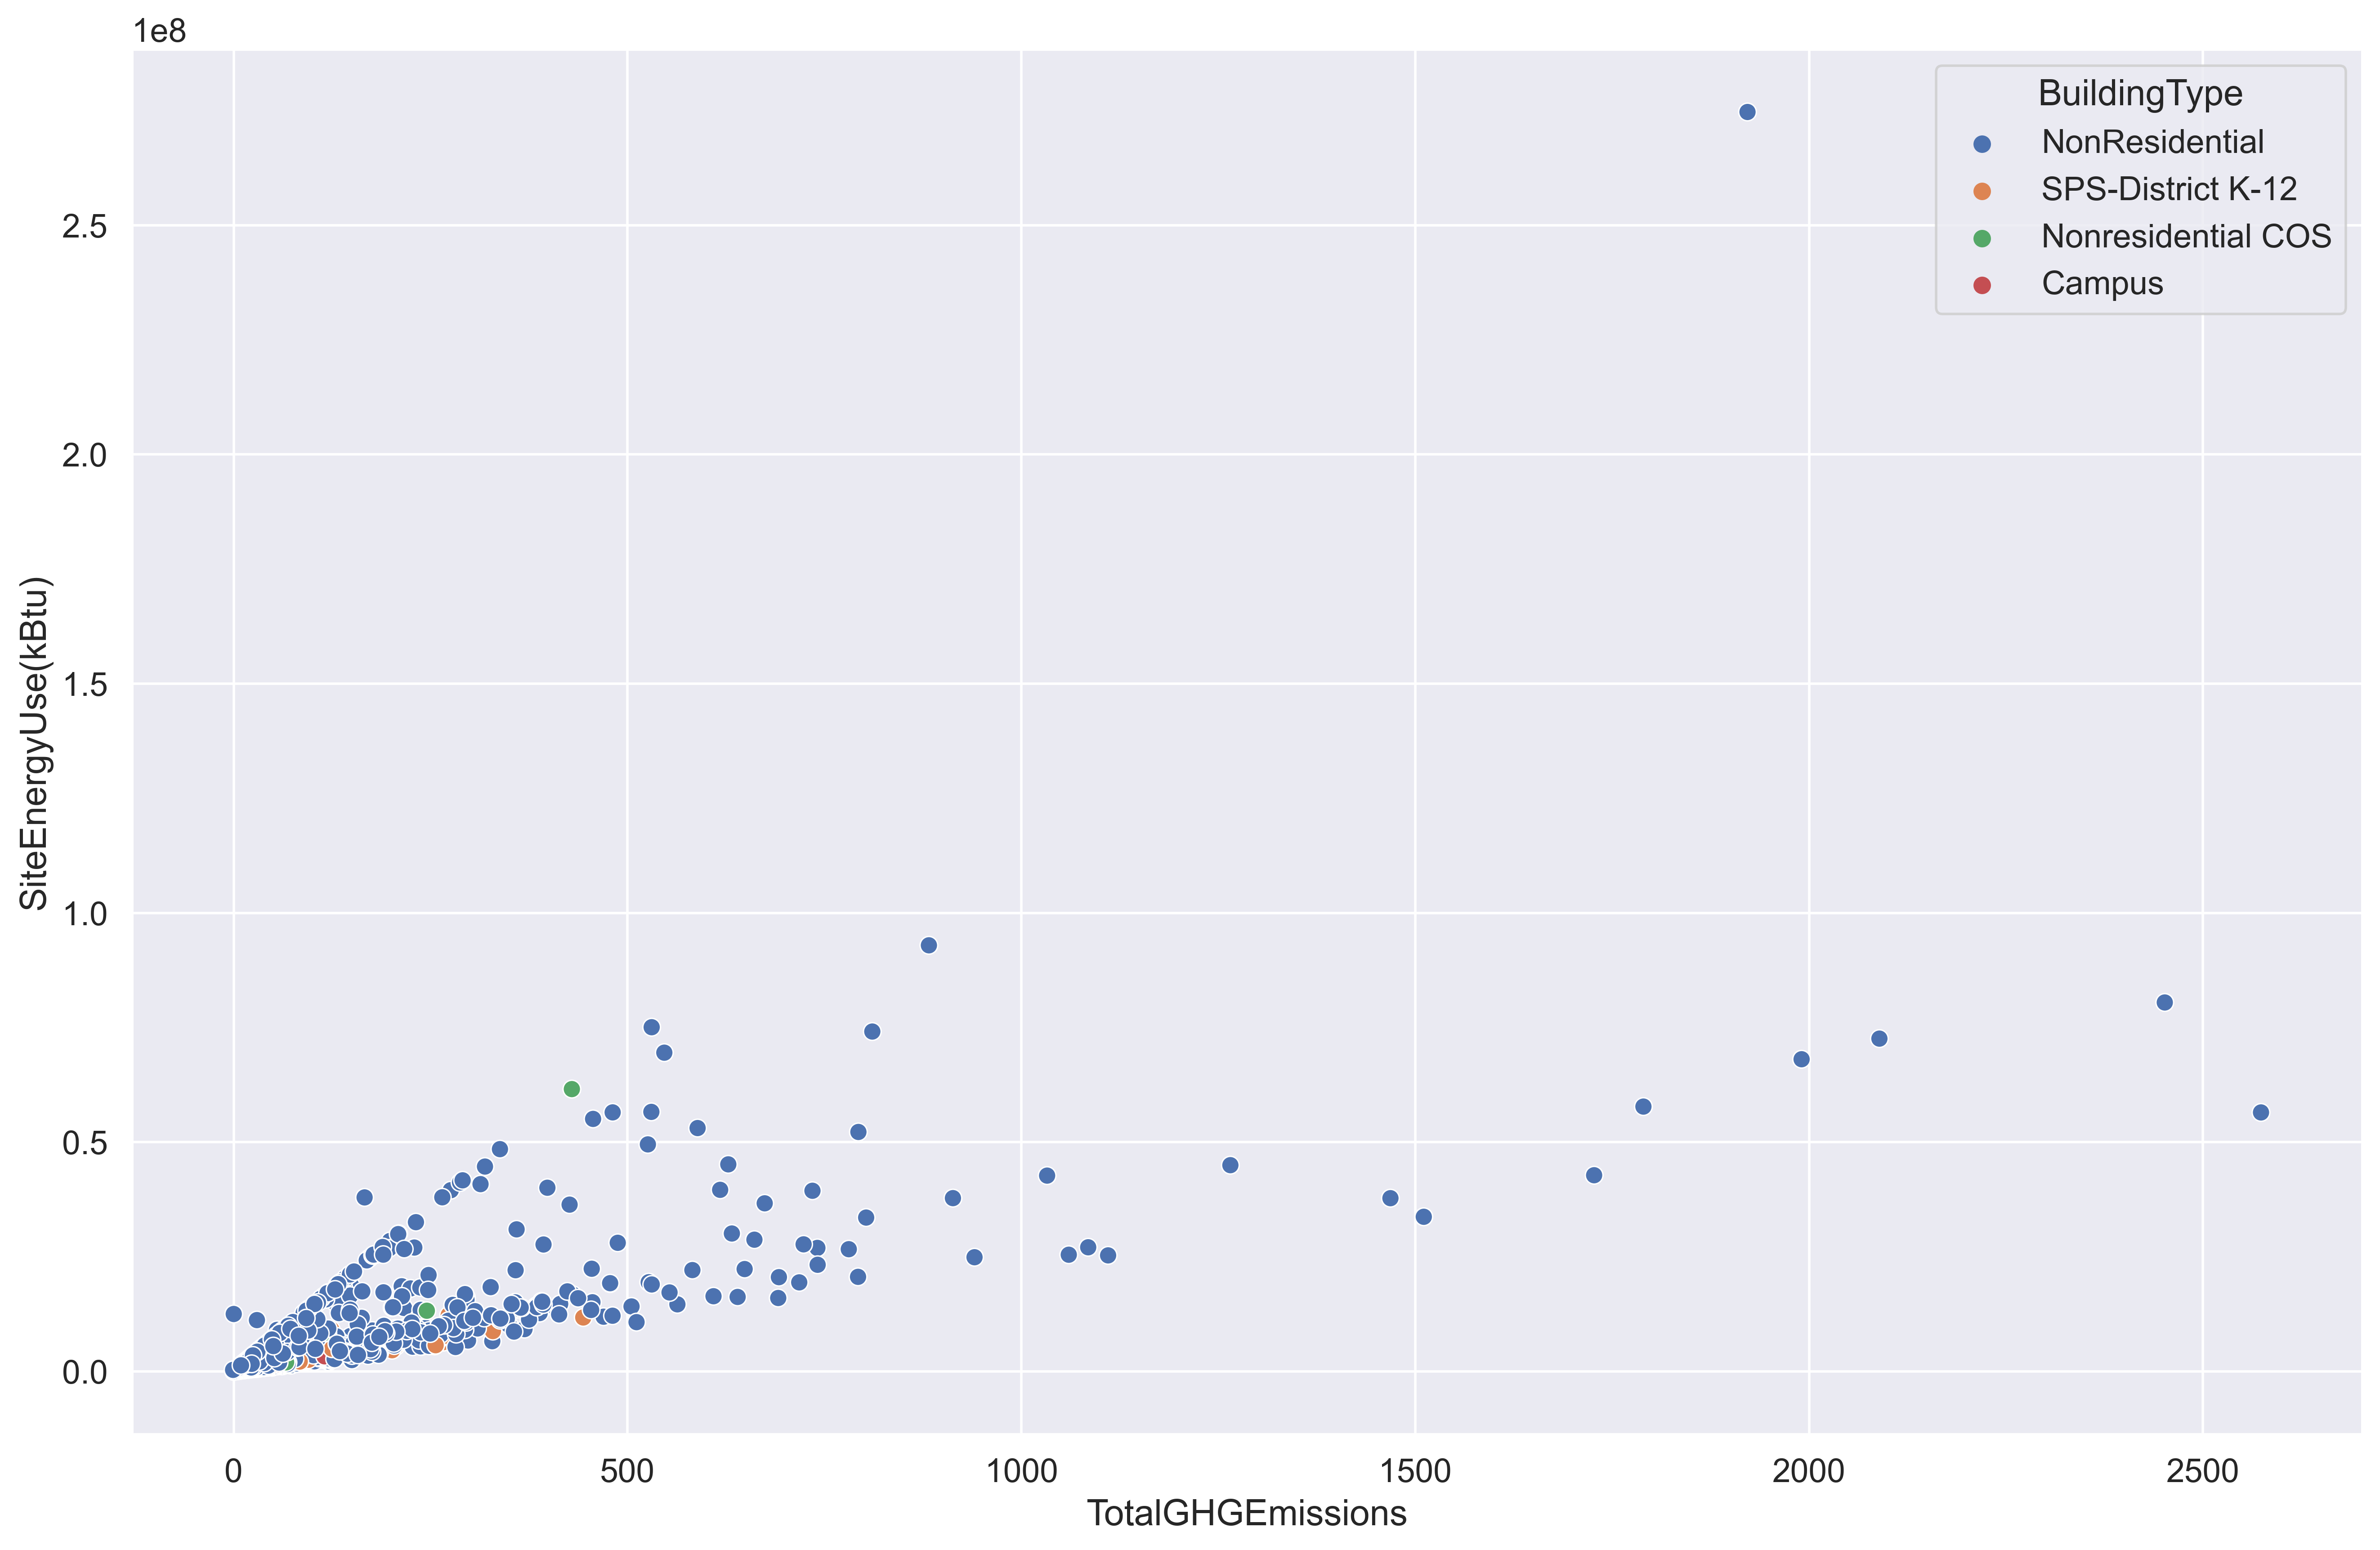

In [ ]:
plt.figure(figsize=(16, 10), dpi=400)
sns.set(font_scale=1.2)
ax = sns.scatterplot(y='SiteEnergyUse(kBtu)',
                     x='TotalGHGEmissions',
                     data=df[df['TotalGHGEmissions'] < 3000],
                     s=50,
                     hue='BuildingType')
plt.savefig("my_plot2.JPEG", bbox_inches="tight")
    
plt.show()

In [ ]:
df[df['SiteEnergyUse(kBtu)'] > 4*10**8]

OSEBuildingID BuildingType PrimaryPropertyType      Neighborhood   
35             43       Campus  Mixed Use Property  GREATER DUWAMISH  \

    Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors   
35  47.53493 -122.31788       1992                1.0               3  \

    PropertyGFATotal  ...  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)   
35            494835  ...          388.200012            400.299988  \

   SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu)  SteamUse(kBtu)   
35         448385312.0           471613856.0             0.0  \

    Electricity(kBtu)  NaturalGas(kBtu)  ComplianceStatus  TotalGHGEmissions   
35        150476283.0       297909000.0         Compliant           16870.98  \

    GHGEmissionsIntensity  
35                  34.09  

[1 rows x 27 columns]

In [ ]:
df[df['TotalGHGEmissions'] > 15000]

OSEBuildingID BuildingType PrimaryPropertyType      Neighborhood   
35             43       Campus  Mixed Use Property  GREATER DUWAMISH  \

    Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors   
35  47.53493 -122.31788       1992                1.0               3  \

    PropertyGFATotal  ...  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)   
35            494835  ...          388.200012            400.299988  \

   SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu)  SteamUse(kBtu)   
35         448385312.0           471613856.0             0.0  \

    Electricity(kBtu)  NaturalGas(kBtu)  ComplianceStatus  TotalGHGEmissions   
35        150476283.0       297909000.0         Compliant           16870.98  \

    GHGEmissionsIntensity  
35                  34.09  

[1 rows x 27 columns]

In [ ]:
df.groupby('BuildingType')[['ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].mean()


ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions
BuildingType                                                               
Campus                    56.600000         9.243406e+07        3464.578000
NonResidential            63.822581         8.356254e+06         176.276109
Nonresidential COS        57.000000         1.300886e+07         163.223750
SPS-District K-12         85.614458         3.433440e+06          97.290723

In [ ]:
df = df[df['SiteEnergyUse(kBtu)'] < 8*10**8]


In [ ]:
df = df[df['TotalGHGEmissions'] < 15*10**3]

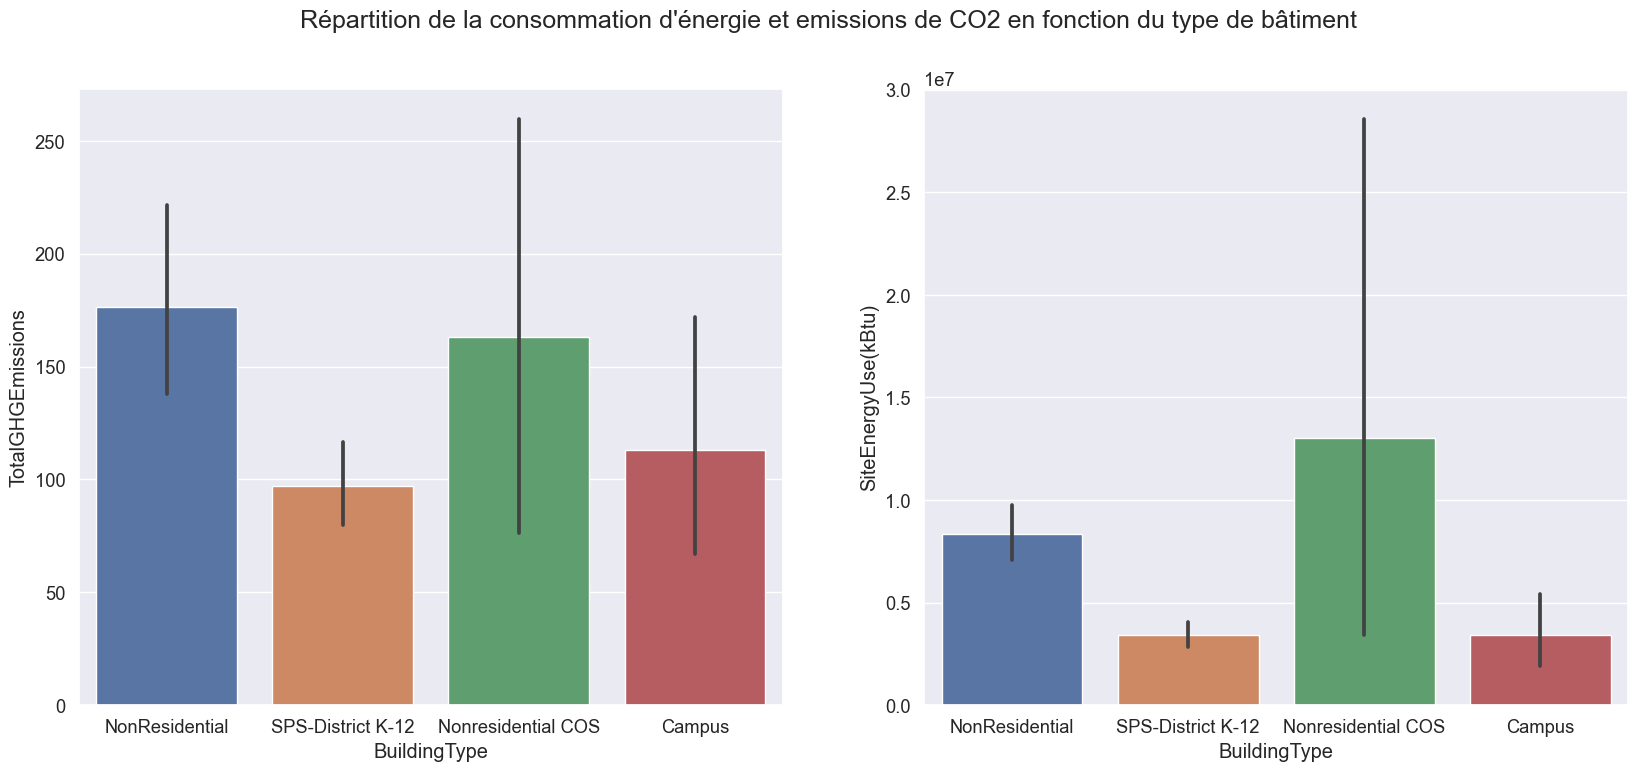

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=df, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=df, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontsize=18)
plt.savefig("my_plot3.JPEG", bbox_inches="tight")
plt.show()

In [ ]:
df[df['BuildingType'] == 'Campus'].sort_values(by=['NumberofBuildings'], ascending=False)

OSEBuildingID BuildingType PrimaryPropertyType Neighborhood  Latitude   
954           20325       Campus         K-12 School    NORTHEAST  47.68700  \
2270          25069       Campus         K-12 School         EAST  47.60776   
2993          27799       Campus         K-12 School      CENTRAL  47.62291   
3022          27901       Campus         K-12 School      CENTRAL  47.62291   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors   
954  -122.30013       1989                5.0               3  \
2270 -122.32481       1923                1.0               4   
2993 -122.28879       1950                1.0               1   
3022 -122.28879       2000                1.0               2   

      PropertyGFATotal  ...  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)   
954              21500  ...          144.899994            149.500000  \
2270             46100  ...          101.199997            106.800003   
2993            109794  ...           56.200001             59.599998   
3022             30562  ...          100.800003            107.800003   

     SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu)  SteamUse(kBtu)   
954          6689184.000           7109712.500          0.0000  \
2270         2177064.750           2412536.250     548294.6875   
2993         3296526.250           3657784.250          0.0000   
3022         1622231.375           1824440.125          0.0000   

      Electricity(kBtu)  NaturalGas(kBtu)  ComplianceStatus   
954           3307692.0         3381491.0         Compliant  \
2270          1097533.0          531237.0         Compliant   
2993          1294767.0         2001759.0         Compliant   
3022           659450.0          962781.0         Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
954              202.65                   9.43  
2270              78.19                   1.70  
2993             115.34                   1.05  
3022              55.73                   1.82  

[4 rows x 27 columns]

In [ ]:
print('TotalGHGEmissions')
print('----'*10)
print("moy:", df['TotalGHGEmissions'].mean())
print("med:", df['TotalGHGEmissions'].median())
print("std:", df['TotalGHGEmissions'].std(ddof=0))
print("skw:", df['TotalGHGEmissions'].skew())
print("kur:", df['TotalGHGEmissions'].kurtosis())

print('\nSiteEnergyUse(kBtu)')
print('----'*10)
print("moy:", df['SiteEnergyUse(kBtu)'].mean())
print("med:", df['SiteEnergyUse(kBtu)'].median())
print("std:", df['SiteEnergyUse(kBtu)'].std(ddof=0))
print("skw:", df['SiteEnergyUse(kBtu)'].skew())
print("kur:", df['SiteEnergyUse(kBtu)'].kurtosis())

TotalGHGEmissions
----------------------------------------
moy: 169.91603495860167
med: 50.07
std: 652.4090917571343
skw: 13.065585631580056
kur: 203.35076140399525

SiteEnergyUse(kBtu)
----------------------------------------
moy: 7996536.969104858
med: 2661488.0
std: 20889844.79675894
skw: 9.275530709523494
kur: 109.12491110430591


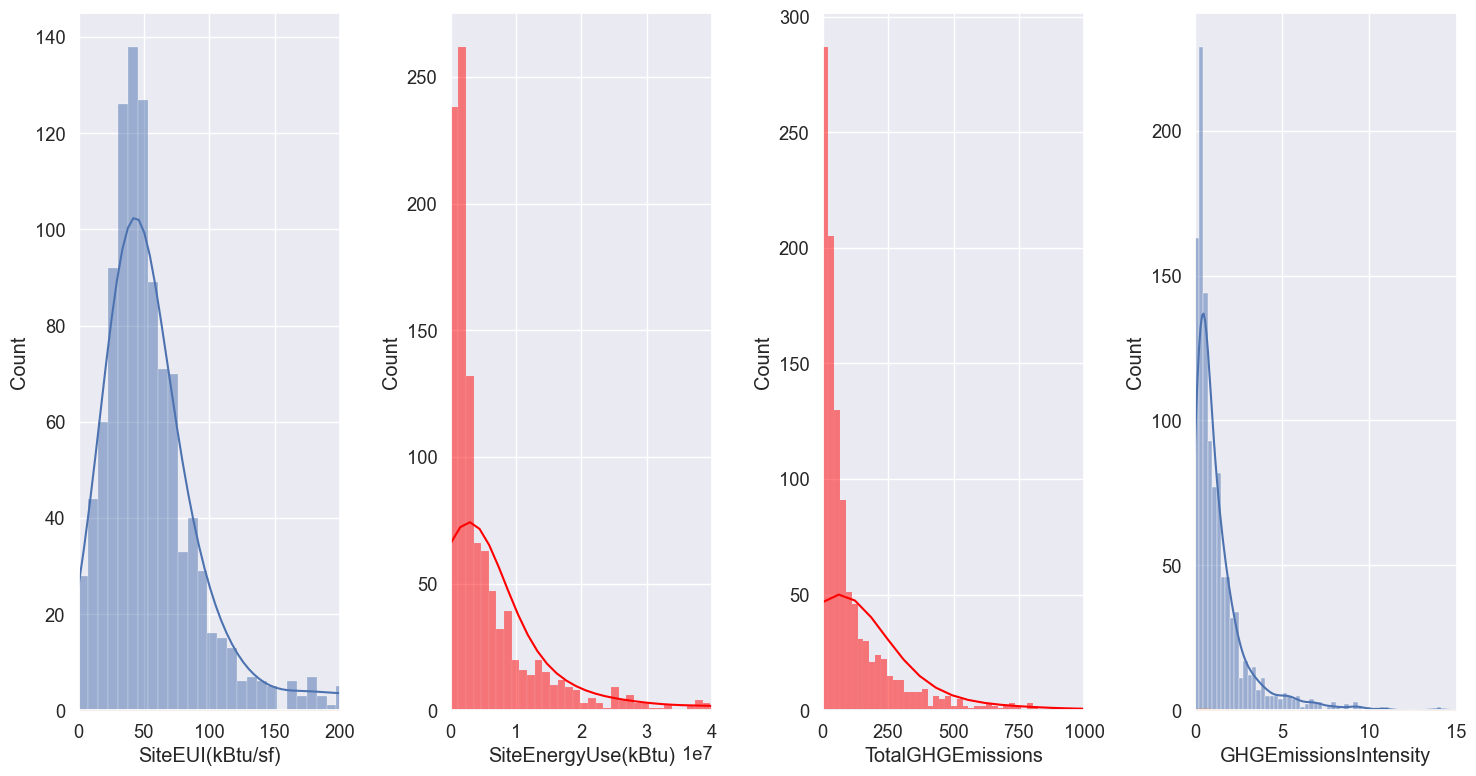

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 8))
sns.histplot(data=df, x='SiteEUI(kBtu/sf)', ax=ax[0], kde=True)
sns.kdeplot(data=df, x='SiteEUI(kBtu/sf)', ax=ax[0], fill=True, alpha=.5)
ax[0].set_xlim(0, 200)

sns.histplot(data=df, x='SiteEnergyUse(kBtu)', ax=ax[1], kde=True, color='red')
sns.kdeplot(data=df, x='SiteEnergyUse(kBtu)', ax=ax[1], fill=True, alpha=.5)
ax[1].set_xlim(0, 40000000) 

sns.histplot(data=df, x='TotalGHGEmissions', ax=ax[2], kde=True, color='red')
sns.kdeplot(data=df, x='TotalGHGEmissions', ax=ax[2], fill=True,  alpha=.5)
ax[2].set_xlim(0, 1000) 

sns.histplot(data=df, x='GHGEmissionsIntensity', ax=ax[3], kde=True)
sns.kdeplot(data=df, x='GHGEmissionsIntensity', ax=ax[3], fill=True, alpha=.5)
ax[3].set_xlim(0, 15) 
plt.tight_layout()
plt.savefig("my_plot4.JPEG", bbox_inches="tight")
plt.show()


In [ ]:
logtransformer = FunctionTransformer(np.log, inverse_func=np.exp, check_inverse=True)

Y_log = logtransformer.transform(Y+1)


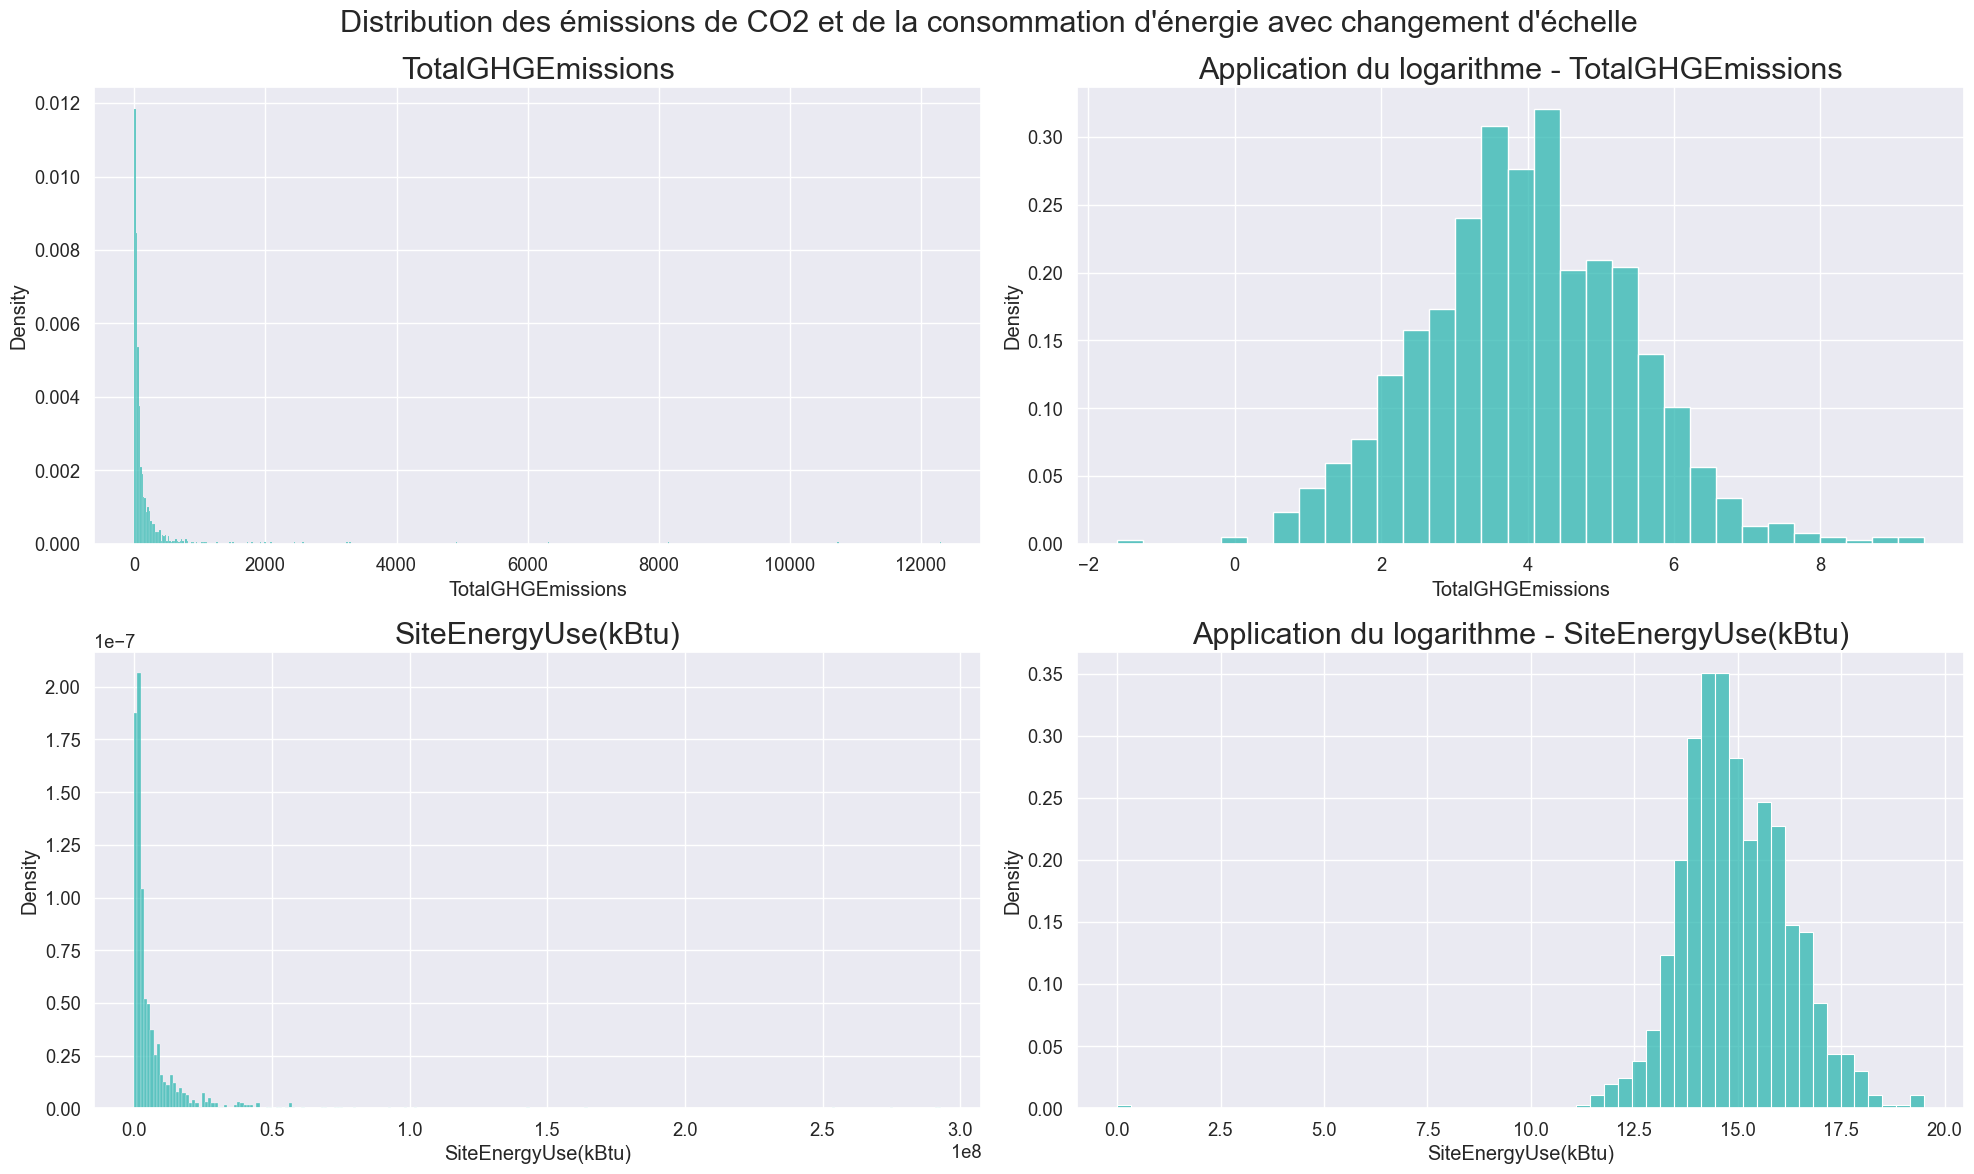

In [ ]:
font_title = {'fontname': 'Arial', 'fontsize': 22}

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(20, 12))

sns.histplot(data=Y, x='TotalGHGEmissions', stat="density", ax=axes[0, 0], color='#2cb7b0')
axes[0, 0].set_title("TotalGHGEmissions", **font_title)

sns.histplot(data=Y_log, x='TotalGHGEmissions', stat="density", ax=axes[0, 1], color='#2cb7b0')
axes[0, 1].set_title("Application du logarithme - TotalGHGEmissions", **font_title)

sns.histplot(data=Y, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1, 0], color='#2cb7b0')
axes[1, 0].set_title("SiteEnergyUse(kBtu)", **font_title)

sns.histplot(data=Y_log, x='SiteEnergyUse(kBtu)', stat="density", ax=axes[1, 1], color='#2cb7b0')
axes[1, 1].set_title("Application du logarithme - SiteEnergyUse(kBtu)", **font_title)

fig.suptitle("Distribution des émissions de CO2 et de la consommation d'énergie avec changement d'échelle", **font_title)
plt.tight_layout()
plt.savefig("my_plot5.JPEG", bbox_inches="tight")
plt.show()

In [ ]:
Y

TotalGHGEmissions  SiteEnergyUse(kBtu)
0                249.98           7226362.50
1                295.86           8387933.00
2               2089.28          72587024.00
3                286.43           6794584.00
4                505.01          14172606.00
...                 ...                  ...
3329             245.16          13239050.00
3337             131.02           6042399.50
3338             157.70           3605855.50
3339             134.80           4420650.50
3347               9.24           1325972.75

[1087 rows x 2 columns]

In [ ]:
Y_log

TotalGHGEmissions  SiteEnergyUse(kBtu)
0              5.525373            15.793246
1              5.693261            15.942305
2              7.645053            18.100297
3              5.660979            15.731637
4              6.226556            16.466822
...                 ...                  ...
3329           5.505982            16.398681
3337           4.882953            15.614312
3338           5.067016            15.098070
3339           4.911183            15.301798
3347           2.326302            14.097658

[1087 rows x 2 columns]

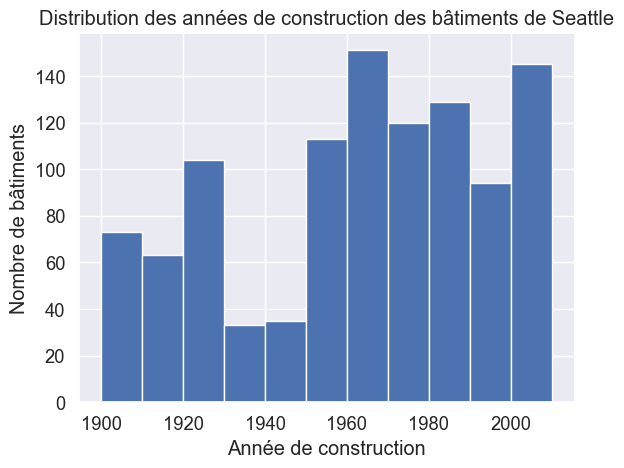

In [ ]:
plt.hist(df['YearBuilt'], bins=range(1900, 2020, 10))
plt.xlabel('Année de construction')
plt.ylabel('Nombre de bâtiments')
plt.title('Distribution des années de construction des bâtiments de Seattle')
plt.savefig("my_plot7.JPEG", bbox_inches="tight")
plt.show()


In [ ]:
def calculate_building_age(df, current_year):
    pd.set_option('mode.use_inf_as_na', True)
    df['BuildingAge'] = current_year - df['YearBuilt']
    df['BuildingAge'].hist(bins=50)
    plt.xlabel('BuildingAge')
    plt.ylabel('Nombre de bâtiments')
    plt.title('Visualize the distribution of building ages')
    plt.savefig("my_plot8.JPEG", bbox_inches="tight")
    return df
    

OSEBuildingID        BuildingType          PrimaryPropertyType   
0                 1      NonResidential                        Hotel  \
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
3329          50054  Nonresidential COS                 Large Office   
3337          50062      NonResidential                        Hotel   
3338          50068      NonResidential                    Warehouse   
3339          50069      NonResidential  Small- and Mid-Sized Office   
3347          50081      NonResidential                  K-12 School   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings   
0             DOWNTOWN  47.61220 -122.33799       1927                1.0  \
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3329        LAKE UNION  47.62251 -122.33390       2014                1.0   
3337        LAKE UNION  47.65476 -122.34732       2014                1.0   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   

      NumberofFloors  PropertyGFATotal  ...  SourceEUIWN(kBtu/sf)   
0                 12             88434  ...            189.000000  \
1                 11            103566  ...            179.399994   
2                 41            956110  ...            244.100006   
3                 10             61320  ...            224.000000   
4                 18            175580  ...            215.600006   
...              ...               ...  ...                   ...   
3329              13            536697  ...            101.599998   
3337               4            126823  ...            169.500000   
3338               1             52085  ...            114.599998   
3339               2             24990  ...            378.700012   
3347               3             45000  ...             96.000000   

      SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu)   
0              7226362.50          7.456910e+06     2003882.00  \
1              8387933.00          8.664479e+06           0.00   
2             72587024.00          7.393711e+07    21566554.00   
3              6794584.00          6.946800e+06     2214446.25   
4             14172606.00          1.465650e+07           0.00   
...                   ...                   ...            ...   
3329          13239050.00          1.403717e+07           0.00   
3337           6042399.50          6.042400e+06           0.00   
3338           3605855.50          4.182622e+06           0.00   
3339           4420650.50          4.731814e+06           0.00   
3347           1325972.75          1.397742e+06           0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  ComplianceStatus   
0             3946027.0         1276453.0         Compliant  \
1             3242851.0         5145082.0         Compliant   
2            49526664.0         1493800.0         Compliant   
3             2768924.0         1811213.0         Compliant   
4             5368607.0         8803998.0         Compliant   
...                 ...               ...               ...   
3329          9925769.0         3313279.0         Compliant   
3337          4115620.0         1926779.0         Compliant   
3338           732803.0    

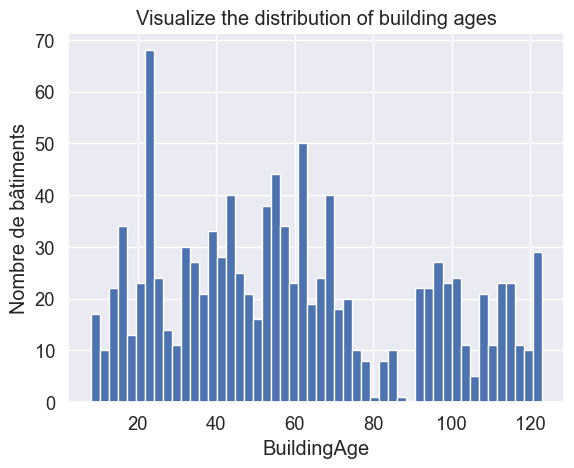

In [ ]:
calculate_building_age(df, 2023)

In [ ]:
df.drop('YearBuilt', axis=1, inplace=True)

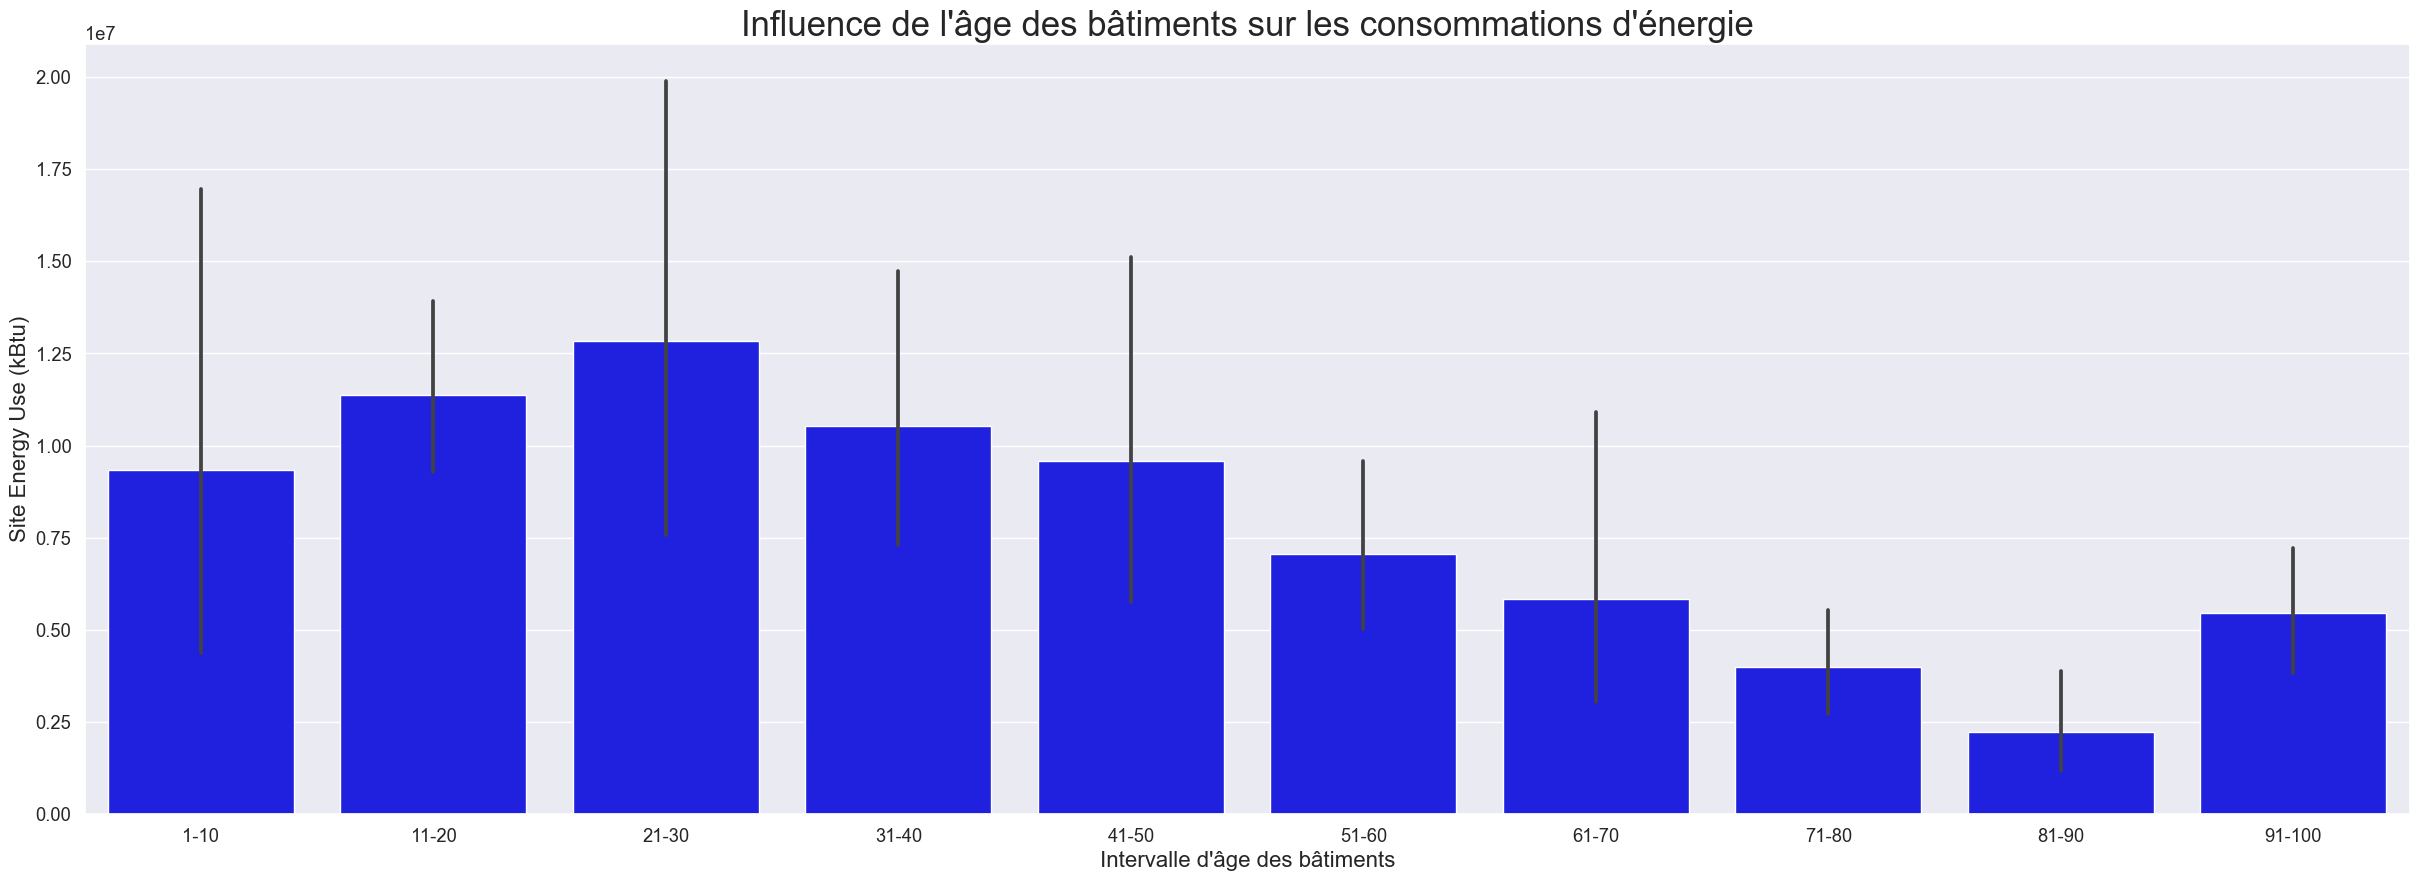

In [ ]:
age_intervals = ["1-10", "11-20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100"]
df['BuildingAgeInterval'] = pd.cut(df['BuildingAge'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=age_intervals)

fig, axes = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x='BuildingAgeInterval', y="SiteEnergyUse(kBtu)", color="blue", order=age_intervals)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie",fontsize=25)
plt.xlabel("Intervalle d'âge des bâtiments",fontsize=16)
plt.ylabel("Site Energy Use (kBtu)",fontsize=16)
plt.show()


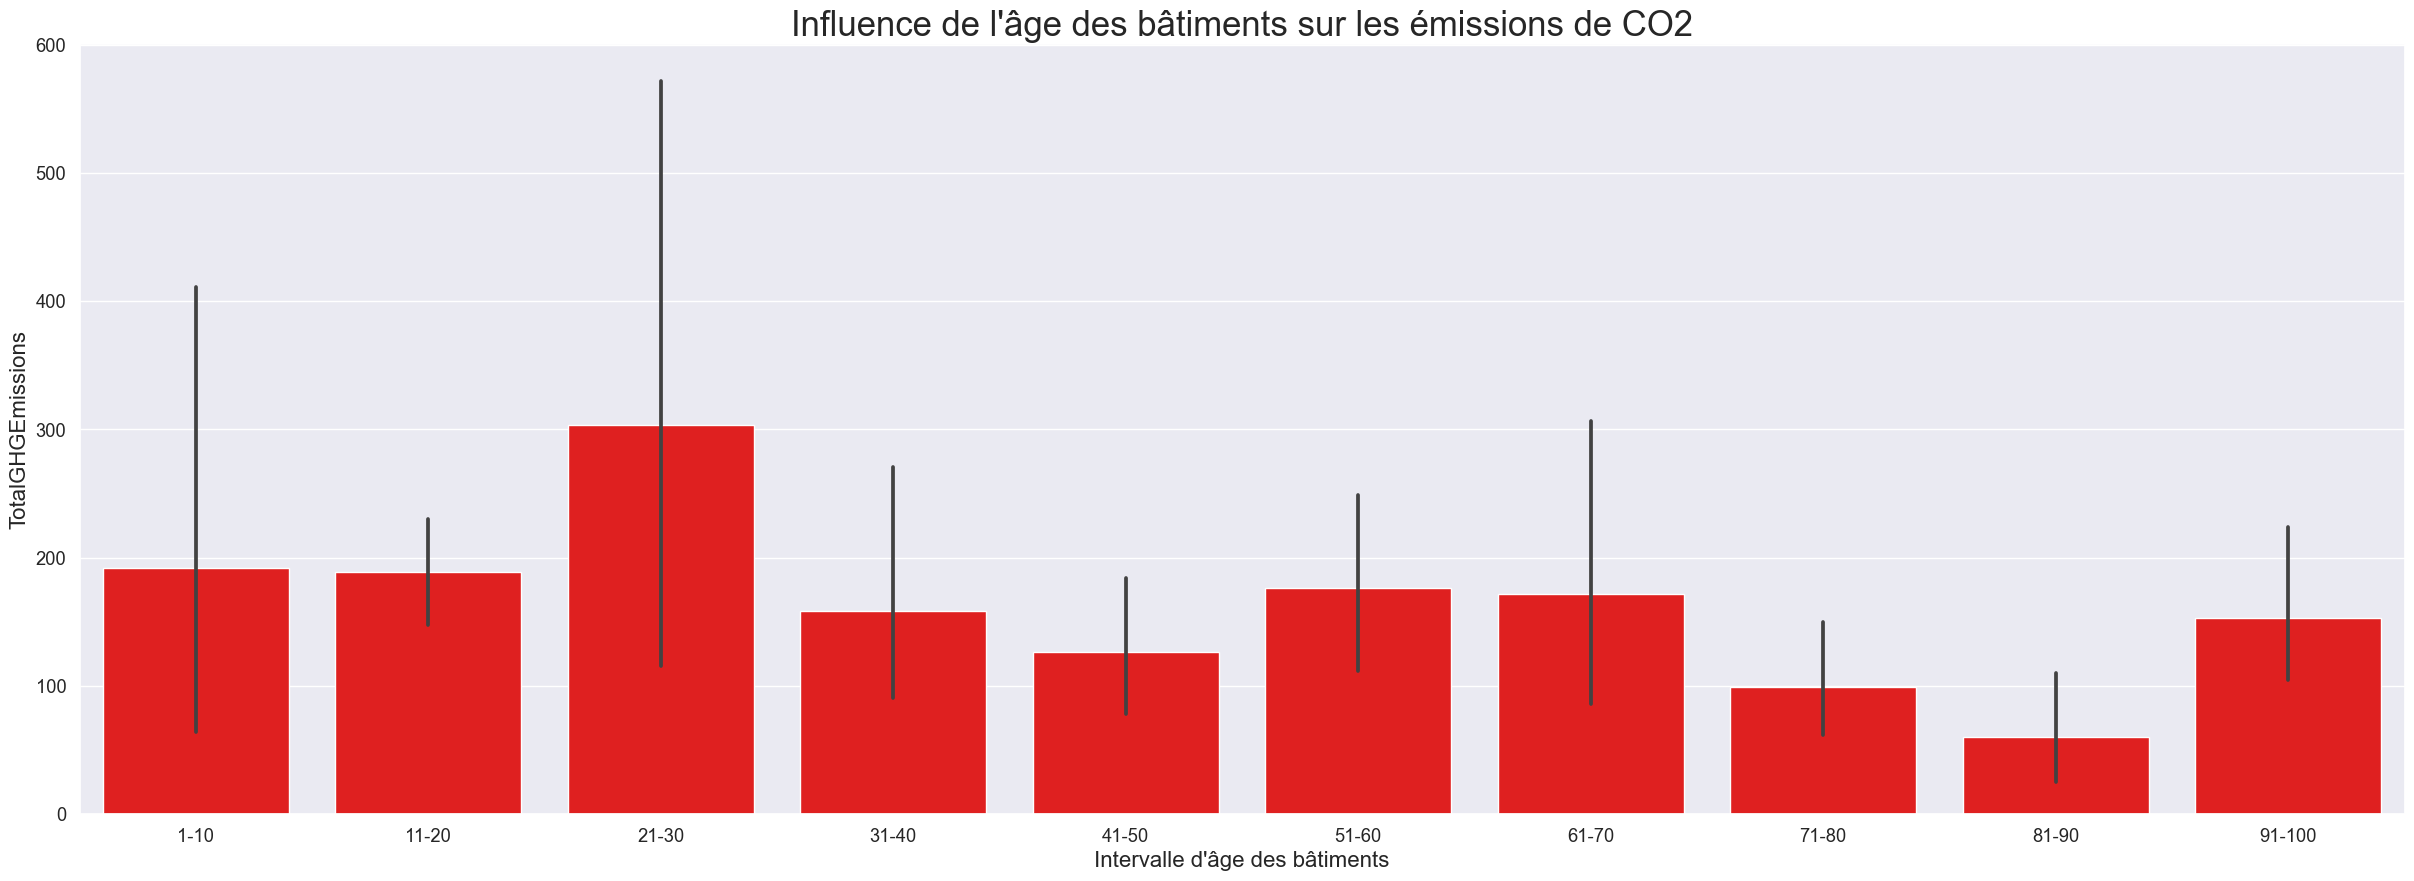

In [ ]:
fig, axes = plt.subplots(figsize=(30, 10))
sns.barplot(data=df, x='BuildingAgeInterval', y="TotalGHGEmissions", color="red", order=age_intervals)

plt.title("Influence de l'âge des bâtiments sur les émissions de CO2",fontsize=25)
plt.xlabel("Intervalle d'âge des bâtiments",fontsize=16)
plt.ylabel("TotalGHGEmissions",fontsize=16)
plt.show()


In [ ]:
df.describe(include='all')

OSEBuildingID    BuildingType          PrimaryPropertyType   
count     1087.000000            1087                         1087  \
unique            NaN               4                           17   
top               NaN  NonResidential  Small- and Mid-Sized Office   
freq              NaN             992                          237   
mean     14720.594296             NaN                          NaN   
std      13276.238959             NaN                          NaN   
min          1.000000             NaN                          NaN   
25%        538.500000             NaN                          NaN   
50%      20503.000000             NaN                          NaN   
75%      24234.500000             NaN                          NaN   
max      50081.000000             NaN                          NaN   

       Neighborhood     Latitude    Longitude  NumberofBuildings   
count          1087  1087.000000  1087.000000        1087.000000  \
unique           18          NaN          NaN                NaN   
top        DOWNTOWN          NaN          NaN                NaN   
freq            247          NaN          NaN                NaN   
mean            NaN    47.615892  -122.332605           1.023919   
std             NaN     0.048958     0.024632           0.507202   
min             NaN    47.499170  -122.411820           0.000000   
25%             NaN    47.584895  -122.343005           1.000000   
50%             NaN    47.612400  -122.333180           1.000000   
75%             NaN    47.650205  -122.321875           1.000000   
max             NaN    47.733870  -122.258640           9.000000   

        NumberofFloors  PropertyGFATotal  PropertyGFAParking  ...   
count      1087.000000      1.087000e+03         1087.000000  ...  \
unique             NaN               NaN                 NaN  ...   
top                NaN               NaN                 NaN  ...   
freq               NaN               NaN                 NaN  ...   
mean          4.873045      1.253461e+05        15191.969641  ...   
std           7.868772      2.041617e+05        45839.739938  ...   
min           0.000000      1.630000e+04            0.000000  ...   
25%           1.000000      3.254550e+04            0.000000  ...   
50%           3.000000      5.428400e+04            0.000000  ...   
75%           5.000000      1.239955e+05            0.000000  ...   
max          99.000000      1.952220e+06       512608.000000  ...   

        SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu)   
count          1.087000e+03          1.087000e+03   1.087000e+03  \
unique                  NaN                   NaN            NaN   
top                     NaN                   NaN            NaN   
freq                    NaN                   NaN            NaN   
mean           7.996537e+06          8.139801e+06   5.498545e+05   
std            2.089946e+07          2.110788e+07   6.163507e+06   
min            0.000000e+00          0.000000e+00   0.000000e+00   
25%            1.289111e+06          1.376778e+06   0.000000e+00   
50%            2.661488e+06          2.808275e+06   0.000000e+00   
75%            7.298149e+06          7.519058e+06   0.000000e+00   
max            2.930908e+08          2.966717e+08   1.349435e+08   

        Electricity(kBtu)  NaturalGas(kBtu)  ComplianceStatus   
count        1.087000e+03      1.087000e+03              1087  \
unique                NaN               NaN                 3   
top                   NaN               NaN         Compliant   
freq                  NaN               NaN               993   
mean         5.764382e+06      1.643536e+06               NaN   
std          1.447766e+07      6.056973e+06               NaN   
min         -1.154170e+05      0.000000e+00               NaN   
25%          7.756195e+05      0.000000e+00               NaN   
50%          1.772188e+06      4.429090e+05               NaN   
75%          5.375170e+06      1.385441e+06           

In [ ]:
#Analyse univariée des autres indicateurs

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 3347
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OSEBuildingID              1087 non-null   int64   
 1   BuildingType               1087 non-null   object  
 2   PrimaryPropertyType        1087 non-null   object  
 3   Neighborhood               1087 non-null   object  
 4   Latitude                   1087 non-null   float64 
 5   Longitude                  1087 non-null   float64 
 6   NumberofBuildings          1087 non-null   float64 
 7   NumberofFloors             1087 non-null   int64   
 8   PropertyGFATotal           1087 non-null   int64   
 9   PropertyGFAParking         1087 non-null   int64   
 10  PropertyGFABuilding(s)     1087 non-null   int64   
 11  ListOfAllPropertyUseTypes  1087 non-null   object  
 12  LargestPropertyUseType     1087 non-null   object  
 13  ENERGYSTARScore            1087 non-nu

In [ ]:
indicateurs = [
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'SteamUse(kBtu)',
    'Electricity(kBtu)', 'NaturalGas(kBtu)'
]

In [ ]:
#PrimaryPropertyType
pd.pivot_table(df, index='PrimaryPropertyType', values=['PropertyGFATotal', 'SiteEnergyUse(kBtu)','TotalGHGEmissions'], aggfunc='sum').sort_values(by='TotalGHGEmissions', ascending=False)


PropertyGFATotal  SiteEnergyUse(kBtu)   
PrimaryPropertyType                                                  
Hospital                              6213004         1.415470e+09  \
Large Office                         59294773         2.774112e+09   
Hotel                                10934957         8.294449e+08   
K-12 School                           9558510         3.828621e+08   
Medical Office                        6224678         4.593048e+08   
Small- and Mid-Sized Office          11059821         6.081636e+08   
Supermarket / Grocery Store           2295441         3.907742e+08   
Senior Care Community                 2268300         2.175029e+08   
Retail Store                          6118294         3.769546e+08   
Warehouse                             9143280         2.586972e+08   
Other                                 1388493         4.104197e+08   
Mixed Use Property                    5169882         3.058790e+08   
Worship Facility                      2018421         7.353260e+07   
Distribution Center                   2756980         1.028143e+08   
Residence Hall                        1502442         7.678430e+07   
Refrigerated Warehouse                 210888         7.522092e+06   
Low-Rise Multifamily                    93079         1.997182e+06   

                             TotalGHGEmissions  
PrimaryPropertyType                             
Hospital                              50529.63  
Large Office                          32664.22  
Hotel                                 27025.79  
K-12 School                           11560.39  
Medical Office                        10163.33  
Small- and Mid-Sized Office            9195.89  
Supermarket / Grocery Store            8499.54  
Senior Care Community                  7185.77  
Retail Store                           7182.41  
Warehouse                              6165.53  
Other                                  3943.20  
Mixed Use Property                     3605.02  
Worship Facility                       2623.10  
Distribution Center                    2216.35  
Residence Hall                         2012.28  
Refrigerated Warehouse                  100.68  
Low-Rise Multifamily                     25.60

In [ ]:
df = df[df['PrimaryPropertyType'] != 'Low-Rise Multifamily']

In [ ]:
px.box(
    df[df.TotalGHGEmissions < 1100],
    x="PrimaryPropertyType",
    y="TotalGHGEmissions", 
    notched=True,
    width=800,
    height=450
).show()

In [ ]:
px.box(
    df[df['SiteEnergyUse(kBtu)'] < 80000000],
    x="PrimaryPropertyType",
    y="SiteEnergyUse(kBtu)", 
    notched=True,
    width=800,
    height=450
).show()

In [ ]:
#LargestPropertyUseType
df.LargestPropertyUseType.value_counts()

LargestPropertyUseType
Office                                   408
Non-Refrigerated Warehouse               145
K-12 School                              125
Retail Store                              79
Hotel                                     72
Worship Facility                          65
Distribution Center                       41
Supermarket/Grocery Store                 38
Medical Office                            37
Residence Hall/Dormitory                  19
Senior Care Community                     18
Hospital (General Medical & Surgical)     10
Parking                                    7
Refrigerated Warehouse                     5
Financial Office                           4
Bank Branch                                4
Data Center                                3
Multifamily Housing                        3
Courthouse                                 1
Wholesale Club/Supercenter                 1
Other                                      1
Name: count, dtype: int64

In [ ]:
df = df[df['LargestPropertyUseType'] != 'Multifamily Housing']

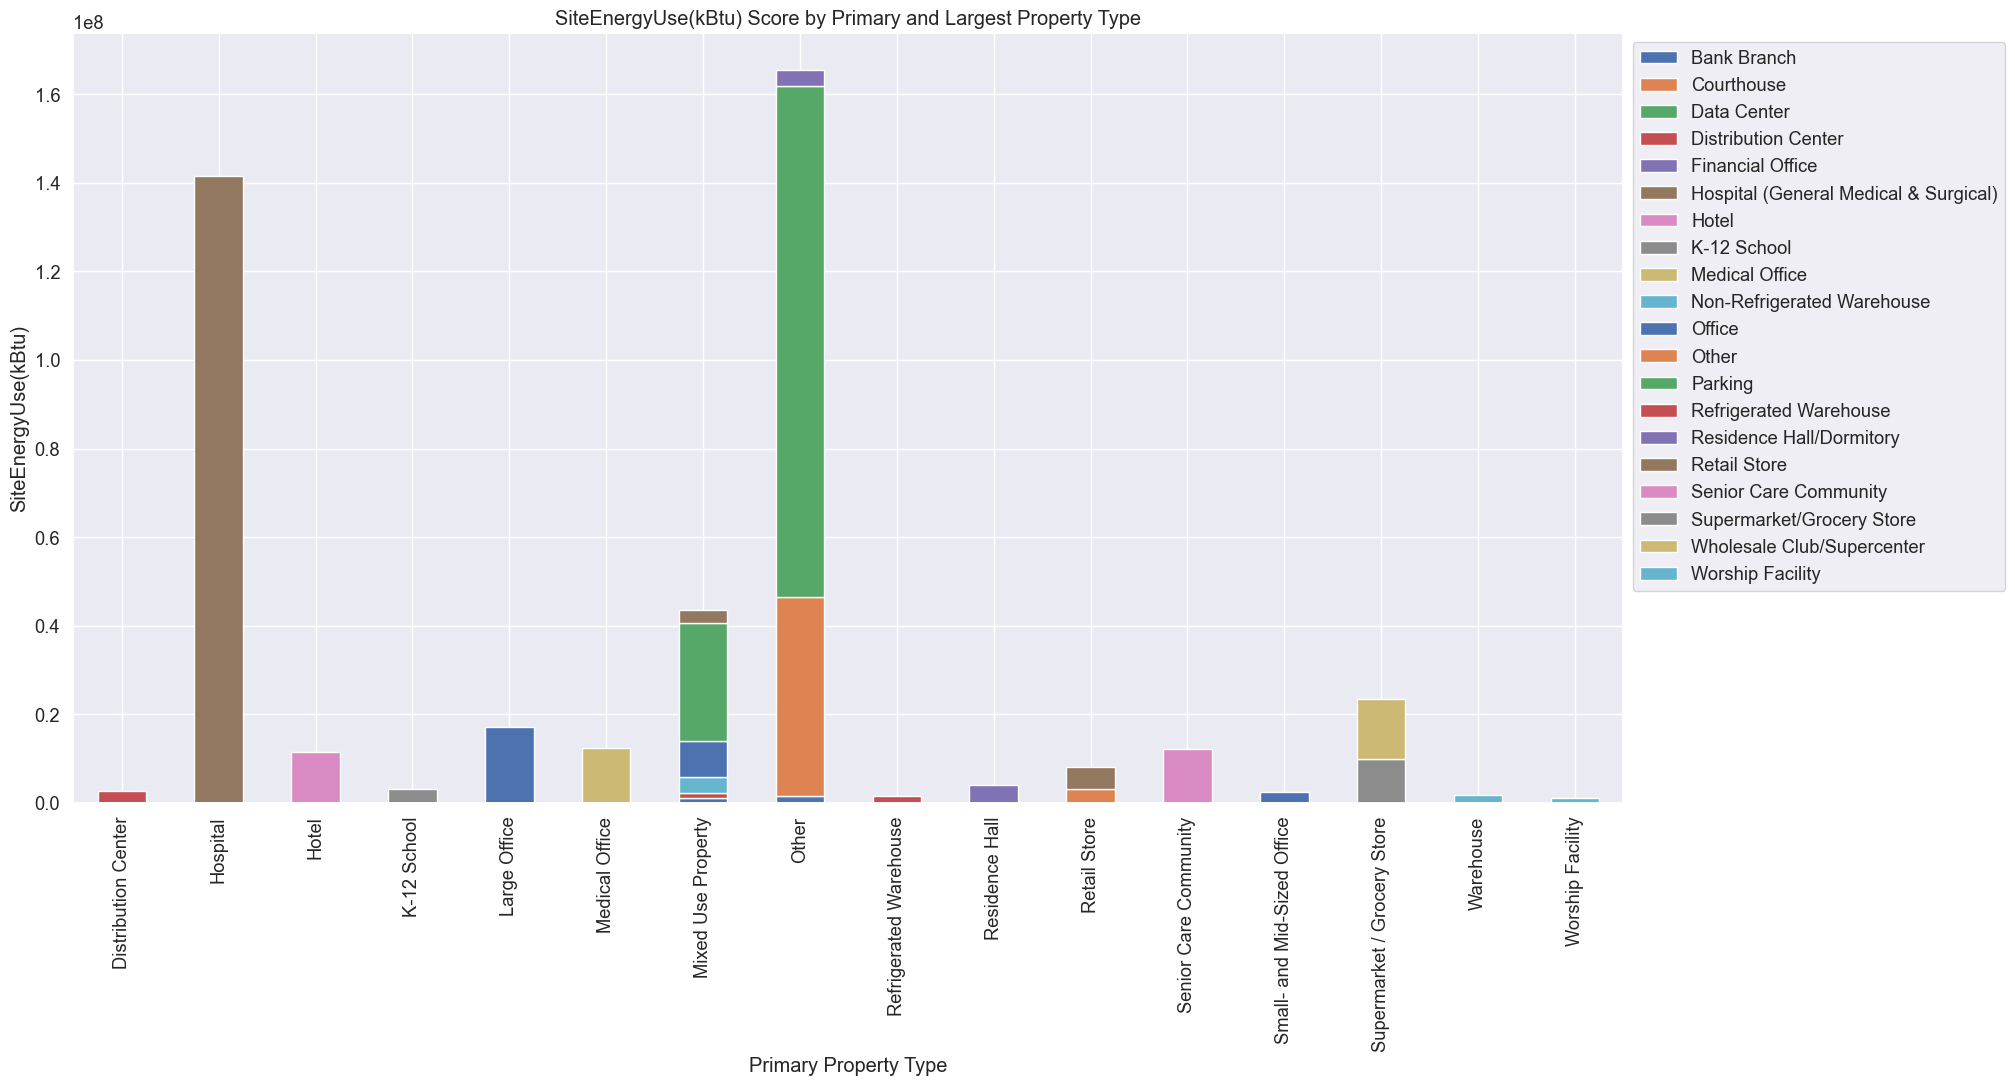

In [ ]:
df.groupby(['PrimaryPropertyType', 'LargestPropertyUseType'])['SiteEnergyUse(kBtu)'].mean().unstack().plot(kind='bar', stacked=True, figsize=(20,10))
plt.ylabel('SiteEnergyUse(kBtu)')
plt.xlabel('Primary Property Type')
plt.title('SiteEnergyUse(kBtu) Score by Primary and Largest Property Type')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

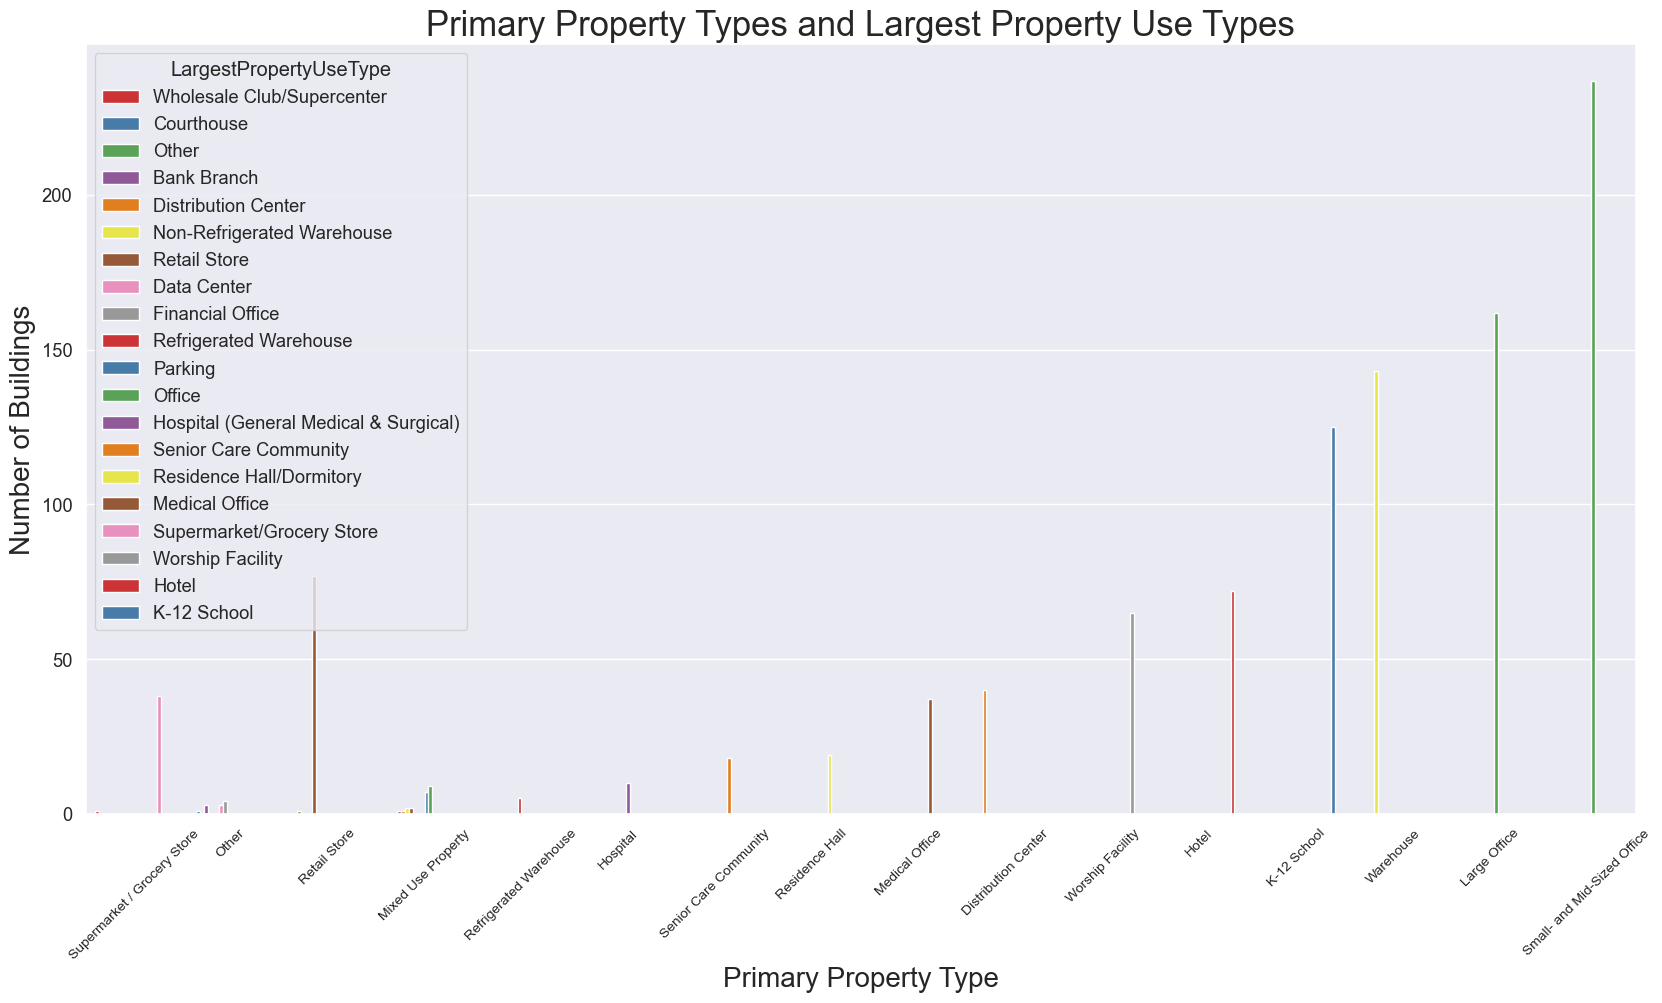

In [ ]:
property_types = df.groupby(["PrimaryPropertyType", "LargestPropertyUseType"]).size().reset_index(name="Count")
property_types = property_types.sort_values(by='Count')
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=property_types, x="PrimaryPropertyType", y="Count", hue="LargestPropertyUseType", palette="Set1")
ax.set_title("Primary Property Types and Largest Property Use Types", fontsize=25)
ax.set_xlabel("Primary Property Type", fontsize=20)
ax.set_ylabel("Number of Buildings", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.bar_width = 8
plt.show()


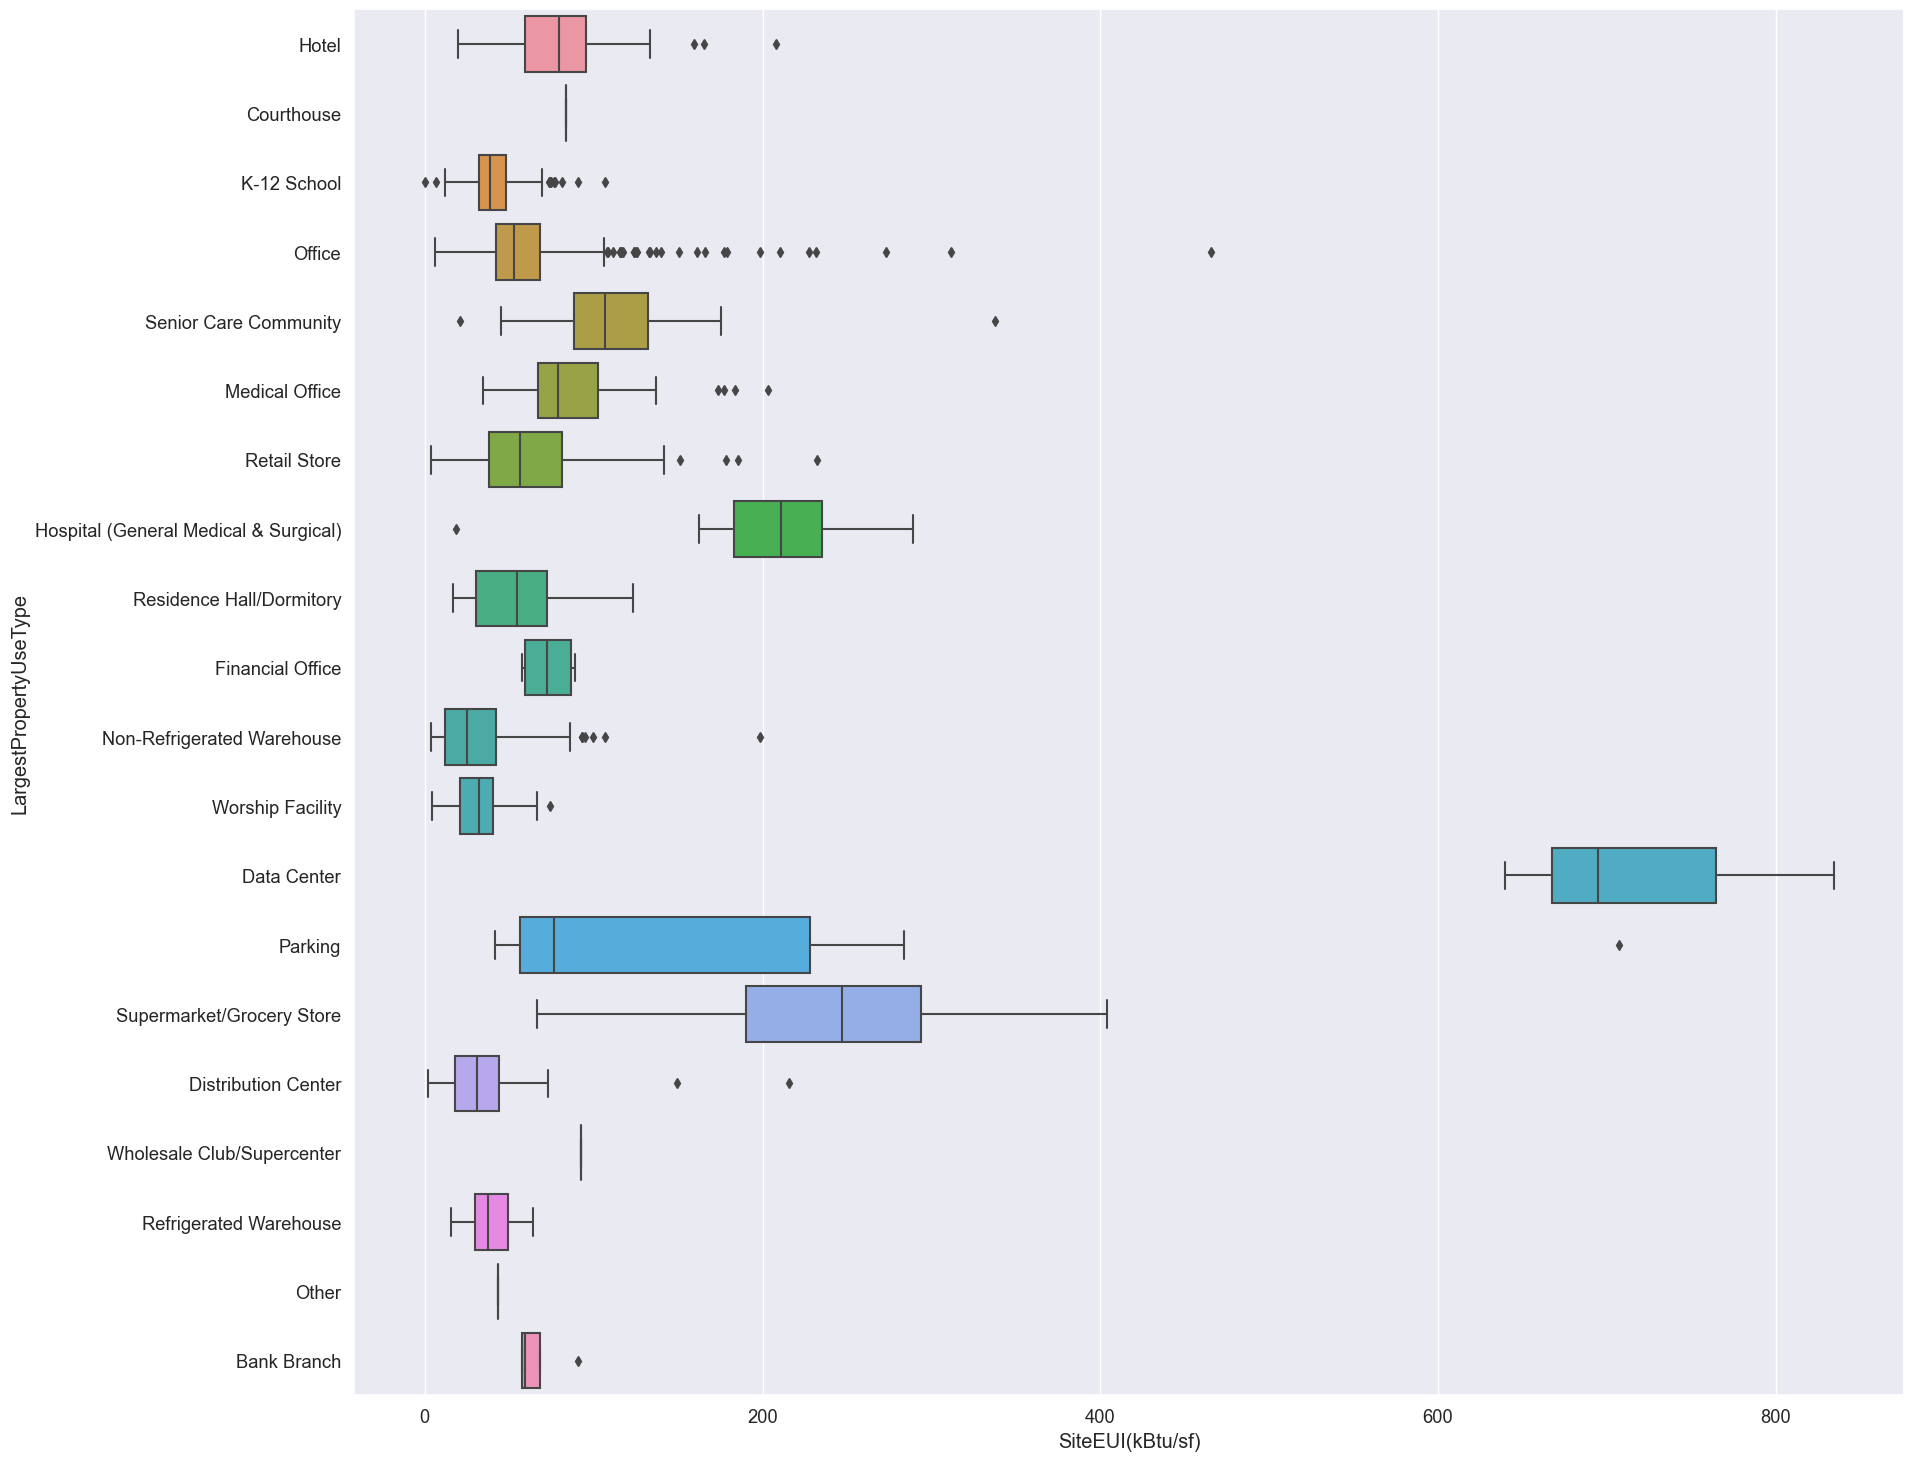

In [ ]:
#LargestPropertyUseType
plt.figure(figsize=(20,18))
sns.boxplot(x='SiteEUI(kBtu/sf)', y='LargestPropertyUseType', data=df);


In [ ]:
px.box(
    df[df['SiteEnergyUse(kBtu)'] < 80000000],
    x="LargestPropertyUseType",
    y="SiteEnergyUse(kBtu)", 
    notched=True,
    width=800,
    height=450
).show()

In [ ]:
px.box(
    df[df.TotalGHGEmissions < 1100],
    x="LargestPropertyUseType",
    y="TotalGHGEmissions", 
    notched=True,
    width=800,
    height=450
).show()

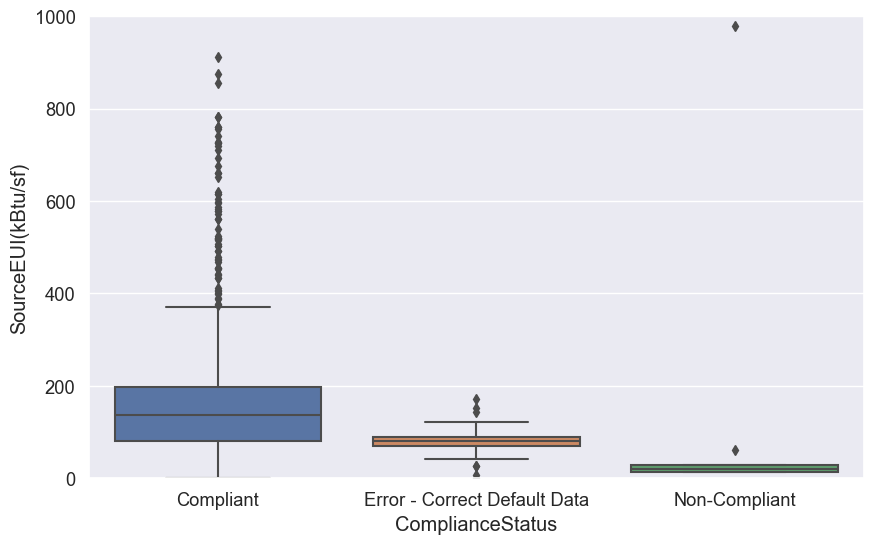

In [ ]:
#ComplianceStatus
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='ComplianceStatus', y='SourceEUI(kBtu/sf)')
plt.ylim(0,1000)
plt.savefig("my_plot9.JPEG", bbox_inches="tight");

In [ ]:
df.ComplianceStatus.value_counts()

ComplianceStatus
Compliant                       989
Error - Correct Default Data     85
Non-Compliant                     9
Name: count, dtype: int64

In [ ]:
df = df[df['ComplianceStatus'] == 'Compliant'].copy()

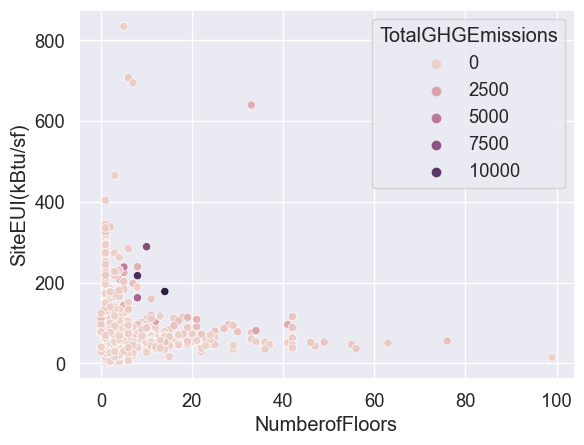

In [ ]:
#Dependency of energy consumption and CO2 emissions on the quantity of floors
sns.scatterplot(data=df, x='NumberofFloors', y='SiteEUI(kBtu/sf)', hue='TotalGHGEmissions');


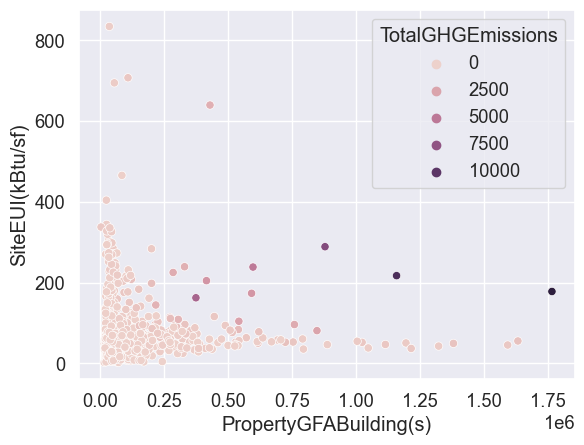

In [ ]:
#Dependency of energy consumption and CO2 emissions on the quantity of area
sns.scatterplot(data=df, x='PropertyGFABuilding(s)', y='SiteEUI(kBtu/sf)', hue='TotalGHGEmissions');

In [ ]:
df.Neighborhood.value_counts()

Neighborhood
DOWNTOWN                 241
GREATER DUWAMISH         199
LAKE UNION               100
MAGNOLIA / QUEEN ANNE     87
NORTHEAST                 80
EAST                      65
NORTHWEST                 51
BALLARD                   33
NORTH                     31
CENTRAL                   25
DELRIDGE                  24
SOUTHEAST                 21
SOUTHWEST                 18
Northwest                  4
Delridge                   3
Ballard                    3
North                      3
Central                    1
Name: count, dtype: int64

In [ ]:
df['Neighborhood'] = df['Neighborhood'].str.upper()

In [ ]:
df.Neighborhood.value_counts()

Neighborhood
DOWNTOWN                 241
GREATER DUWAMISH         199
LAKE UNION               100
MAGNOLIA / QUEEN ANNE     87
NORTHEAST                 80
EAST                      65
NORTHWEST                 55
BALLARD                   36
NORTH                     34
DELRIDGE                  27
CENTRAL                   26
SOUTHEAST                 21
SOUTHWEST                 18
Name: count, dtype: int64

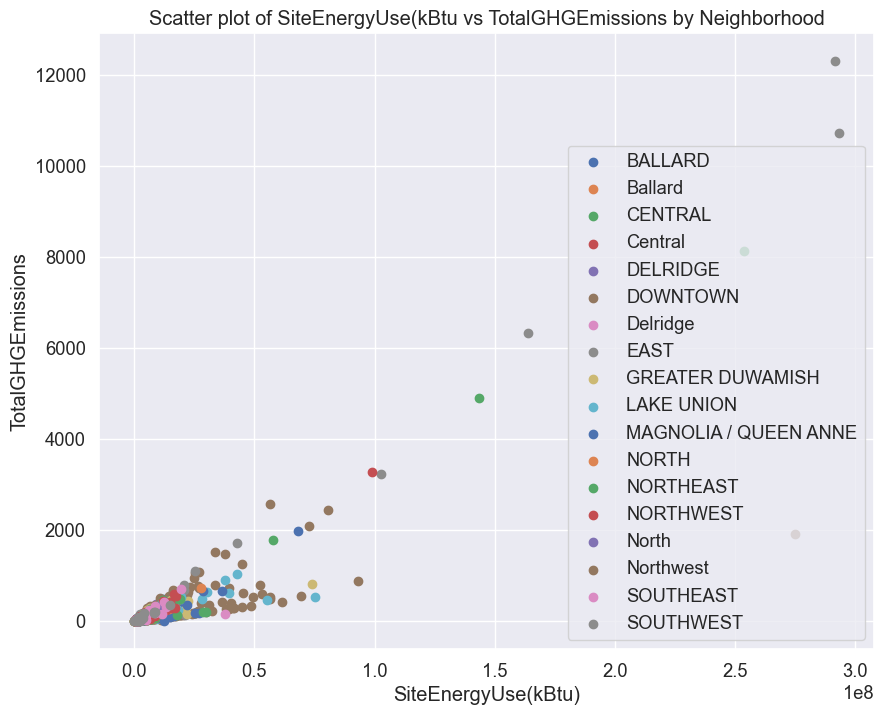

In [ ]:
grouped = df.groupby('Neighborhood')

fig, ax = plt.subplots(figsize=(10, 8))
for name, group in grouped:
    ax.scatter(group['SiteEnergyUse(kBtu)'], group['TotalGHGEmissions'], label=name)
ax.legend()
ax.set_xlabel('SiteEnergyUse(kBtu)')
ax.set_ylabel('TotalGHGEmissions')
ax.set_title('Scatter plot of SiteEnergyUse(kBtu vs TotalGHGEmissions by Neighborhood')
plt.savefig("my_plot10.JPEG", bbox_inches="tight")
plt.show()


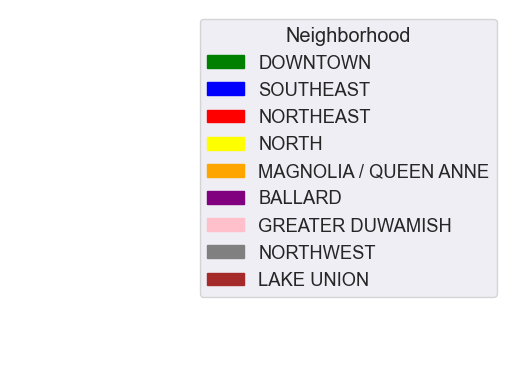

In [ ]:
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)
neighborhoods = df['Neighborhood'].unique()
colors = ['green', 'blue', 'red', 'yellow', 'orange', 'purple', 'pink', 'gray', 'brown']
color_palette = dict(zip(neighborhoods, colors))
for index, row in df.iterrows():
    popup = folium.Popup(f"SiteEnergyUse(kBtu): {row['SiteEnergyUse(kBtu)']}\nTotalGHGEmissions: {row['TotalGHGEmissions']}\nLatitude: {row['Latitude']}\nLongitude: {row['Longitude']}", max_width=200)

    site_energy = row['SiteEnergyUse(kBtu)']
    neighborhood = row['Neighborhood']
    fill_color = color_palette.get(neighborhood, 'green')

    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=fill_color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.6,
        popup=popup
    ).add_to(m)

legend_elements = []
for neighborhood, color in color_palette.items():
    legend_elements.append(mpatches.Patch(color=color, label=neighborhood))
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, title='Neighborhood')
ax.axis('off')
legend_img_buffer = BytesIO()
plt.savefig(legend_img_buffer, format='png', bbox_inches='tight', transparent=True)
legend_img_buffer.seek(0)
legend_img_base64 = base64.b64encode(legend_img_buffer.read()).decode()
m


In [ ]:
#nous utilisons la bibliothèque GeoPy pour trouver la distance  entre le point dans le DataFrame et le centre de Seattle.
latitude_seattle = 47.6062
longitude_seattle = -122.3321
seattle_center = (latitude_seattle, longitude_seattle)

df['DistanceToSeattle'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), seattle_center).miles, axis=1)


SyntaxError: 'return' outside function (4073236449.py, line 7)

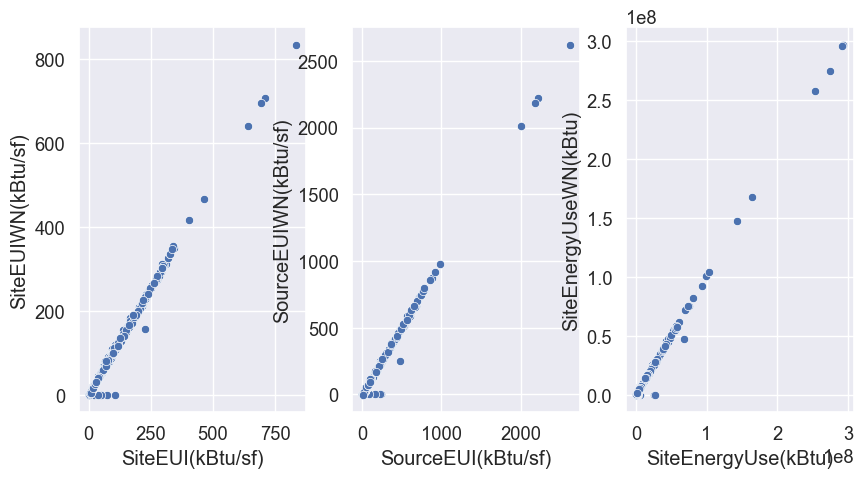

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(10,5))

sns.scatterplot(data=df, ax=ax[0], x='SiteEUI(kBtu/sf)', y='SiteEUIWN(kBtu/sf)')
sns.scatterplot(data=df, ax=ax[1], x='SourceEUI(kBtu/sf)', y='SourceEUIWN(kBtu/sf)')
sns.scatterplot(data=df, ax=ax[2], x='SiteEnergyUse(kBtu)', y='SiteEnergyUseWN(kBtu)')
return df;

In [ ]:
df.drop(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'],
       axis=1, inplace=True)

In [ ]:
df = df[df['TotalGHGEmissions'] > 0].copy()

In [ ]:
df

OSEBuildingID        BuildingType          PrimaryPropertyType   
0                 1      NonResidential                        Hotel  \
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
3329          50054  Nonresidential COS                 Large Office   
3337          50062      NonResidential                        Hotel   
3338          50068      NonResidential                    Warehouse   
3339          50069      NonResidential  Small- and Mid-Sized Office   
3347          50081      NonResidential                  K-12 School   

          Neighborhood  Latitude  Longitude  NumberofBuildings   
0             DOWNTOWN  47.61220 -122.33799                1.0  \
1             DOWNTOWN  47.61317 -122.33393                1.0   
2             DOWNTOWN  47.61393 -122.33810                1.0   
3             DOWNTOWN  47.61412 -122.33664                1.0   
4             DOWNTOWN  47.61375 -122.34047                1.0   
...                ...       ...        ...                ...   
3329        LAKE UNION  47.62251 -122.33390                1.0   
3337        LAKE UNION  47.65476 -122.34732                1.0   
3338  GREATER DUWAMISH  47.54425 -122.31776                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  ...   
0                 12             88434                   0  ...  \
1                 11            103566               15064  ...   
2                 41            956110              196718  ...   
3                 10             61320                   0  ...   
4                 18            175580               62000  ...   
...              ...               ...                 ...  ...   
3329              13            536697              197659  ...   
3337               4            126823               41539  ...   
3338               1             52085                4222  ...   
3339               2             24990                   0  ...   
3347               3             45000                   0  ...   

      SiteEnergyUse(kBtu) SteamUse(kBtu) Electricity(kBtu)  NaturalGas(kBtu)   
0              7226362.50     2003882.00         3946027.0         1276453.0  \
1              8387933.00           0.00         3242851.0         5145082.0   
2             72587024.00    21566554.00        49526664.0         1493800.0   
3              6794584.00     2214446.25         2768924.0         1811213.0   
4             14172606.00           0.00         5368607.0         8803998.0   
...                   ...            ...               ...               ...   
3329          13239050.00           0.00         9925769.0         3313279.0   
3337           6042399.50           0.00         4115620.0         1926779.0   
3338           3605855.50           0.00          732803.0         2873052.0   
3339           4420650.50           0.00         2167029.0         2253621.0   
3347           1325972.75           0.00         1325973.0               0.0   

      ComplianceStatus  TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge   
0            Compliant             249.98                   2.83           96  \
1            Compliant             295.86                   2.86           27   
2            Compliant            2089.28                   2.19           54   
3            Compliant             286.43                   4.67           97   
4            Compliant             505.01                   2.88           43   
...                ...                ...                    ...          ...   
3329         Co

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 3347
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   OSEBuildingID              987 non-null    int64   
 1   BuildingType               987 non-null    object  
 2   PrimaryPropertyType        987 non-null    object  
 3   Neighborhood               987 non-null    object  
 4   Latitude                   987 non-null    float64 
 5   Longitude                  987 non-null    float64 
 6   NumberofBuildings          987 non-null    float64 
 7   NumberofFloors             987 non-null    int64   
 8   PropertyGFATotal           987 non-null    int64   
 9   PropertyGFAParking         987 non-null    int64   
 10  PropertyGFABuilding(s)     987 non-null    int64   
 11  ListOfAllPropertyUseTypes  987 non-null    object  
 12  LargestPropertyUseType     987 non-null    object  
 13  ENERGYSTARScore            987 non-null

In [ ]:
#il y a des feautures qui sont calculés à partir de variables 'TotalGHGEmissions' ou/et 'SiteEnergyUse(kBtu)'.

#Ce sont les features avec les suffix EUI(kBtu/sf) dont les valeurs sont ramenées à la surface par étage: SourceEUI(kBtu/sf), SiteEUI(kBtu/sf)
df=df.drop(['Latitude','Longitude','BuildingAgeInterval','ComplianceStatus','SourceEUI(kBtu/sf)','SiteEUI(kBtu/sf)'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 3347
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              987 non-null    int64  
 1   BuildingType               987 non-null    object 
 2   PrimaryPropertyType        987 non-null    object 
 3   Neighborhood               987 non-null    object 
 4   NumberofBuildings          987 non-null    float64
 5   NumberofFloors             987 non-null    int64  
 6   PropertyGFATotal           987 non-null    int64  
 7   PropertyGFAParking         987 non-null    int64  
 8   PropertyGFABuilding(s)     987 non-null    int64  
 9   ListOfAllPropertyUseTypes  987 non-null    object 
 10  LargestPropertyUseType     987 non-null    object 
 11  ENERGYSTARScore            987 non-null    float64
 12  SiteEnergyUse(kBtu)        987 non-null    float64
 13  SteamUse(kBtu)             987 non-null    float64
 14

In [ ]:
# categorical variables
df_categorical = pd.DataFrame(data=df.select_dtypes(include=['object']))
df_categorical.head(10)

BuildingType PrimaryPropertyType Neighborhood   
0   NonResidential               Hotel     DOWNTOWN  \
1   NonResidential               Hotel     DOWNTOWN   
2   NonResidential               Hotel     DOWNTOWN   
3   NonResidential               Hotel     DOWNTOWN   
4   NonResidential               Hotel     DOWNTOWN   
6   NonResidential               Hotel     DOWNTOWN   
8   NonResidential               Hotel     DOWNTOWN   
10  NonResidential               Hotel     DOWNTOWN   
11  NonResidential               Hotel     DOWNTOWN   
12  NonResidential               Hotel     DOWNTOWN   

        ListOfAllPropertyUseTypes LargestPropertyUseType  
0                           Hotel                  Hotel  
1      Hotel, Parking, Restaurant                  Hotel  
2                           Hotel                  Hotel  
3                           Hotel                  Hotel  
4   Hotel, Parking, Swimming Pool                  Hotel  
6                           Hotel                  Hotel  
8                           Hotel                  Hotel  
10                          Hotel                  Hotel  
11                          Hotel                  Hotel  
12                          Hotel                  Hotel

In [ ]:
df_quantitative = pd.DataFrame(data=df.select_dtypes(include=['int64','float64']))
df_quantitative.head(10)

OSEBuildingID  NumberofBuildings  NumberofFloors  PropertyGFATotal   
0               1                1.0              12             88434  \
1               2                1.0              11            103566   
2               3                1.0              41            956110   
3               5                1.0              10             61320   
4               8                1.0              18            175580   
6              10                1.0              11             83008   
8              12                1.0              15            163984   
10             15                1.0              11            153163   
11             16                1.0              25            333176   
12             17                1.0               9             65009   

    PropertyGFAParking  PropertyGFABuilding(s)  ENERGYSTARScore   
0                    0                   88434             60.0  \
1                15064                   88502             61.0   
2               196718                  759392             43.0   
3                    0                   61320             56.0   
4                62000                  113580             75.0   
6                    0                   83008             27.0   
8                    0                  163984             43.0   
10               19279                  133884             30.0   
11               61161                  272015             36.0   
12                   0                   65009             48.0   

    SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)   
0             7226362.5      2003882.00          3946027.0         1276453.0  \
1             8387933.0            0.00          3242851.0         5145082.0   
2            72587024.0     21566554.00         49526664.0         1493800.0   
3             6794584.0      2214446.25          2768924.0         1811213.0   
4            14172606.0            0.00          5368607.0         8803998.0   
6             5758795.0            0.00          2811215.0         2947580.0   
8            13723820.0            0.00          7297919.0         6425900.0   
10           16016644.0      5237165.50          6187627.0         4591850.0   
11           26941110.0      5999360.50         18083049.0         2858700.0   
12            6596057.5      1656352.50          1343000.0         3596705.0   

    TotalGHGEmissions  GHGEmissionsIntensity  BuildingAge  DistanceToSeattle  
0              249.98                   2.83           96           0.497538  
1              295.86                   2.86           27           0.489059  
2             2089.28                   2.19           54           0.603129  
3              286.43                   4.67           97           0.586830  
4              505.01                   2.88           43           0.651898  
6              176.14                   2.12           97           0.533052  
8              392.16                   2.39          119           0.226577  
10             691.26                   4.51           54           0.108485  
11             740.97                   2.22           25           0.083159  
12             328.23                   5.05           95           0.083763

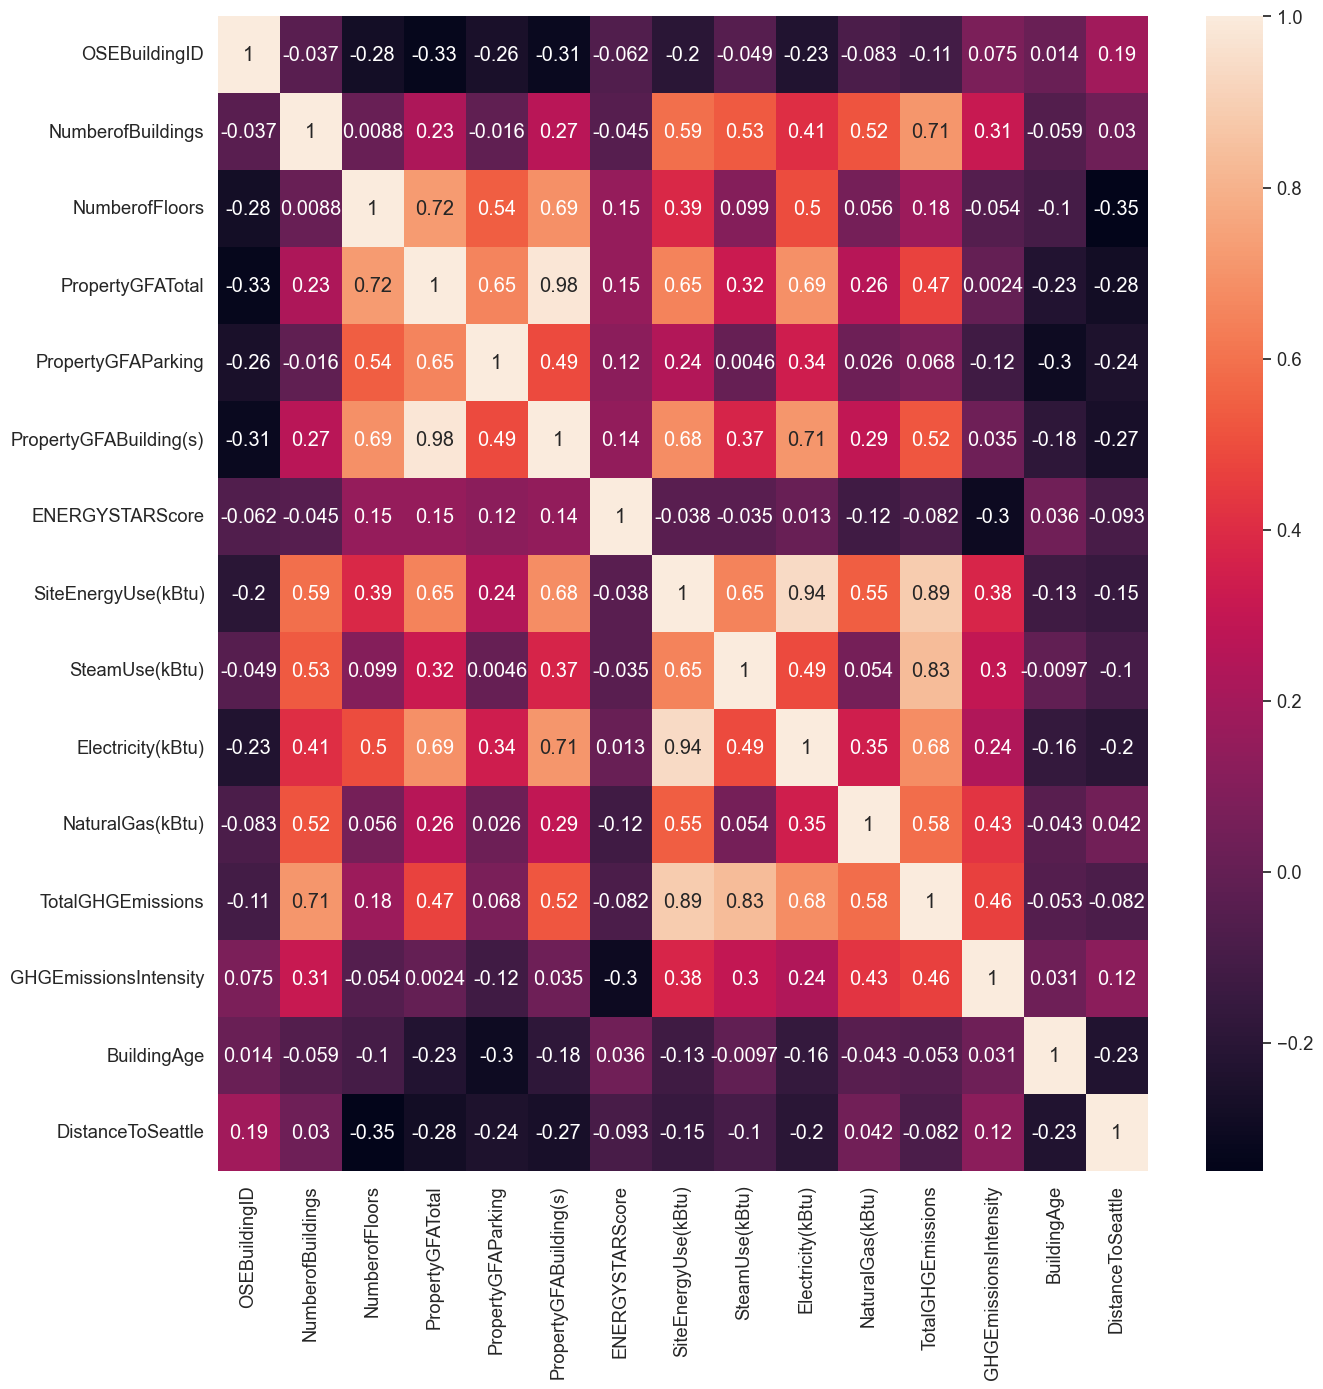

In [ ]:
# correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))
corrMatrix = df_quantitative.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
for col in df_quantitative:
    fig = px.histogram(df, x=col, width=700, height=400)
    fig.show()


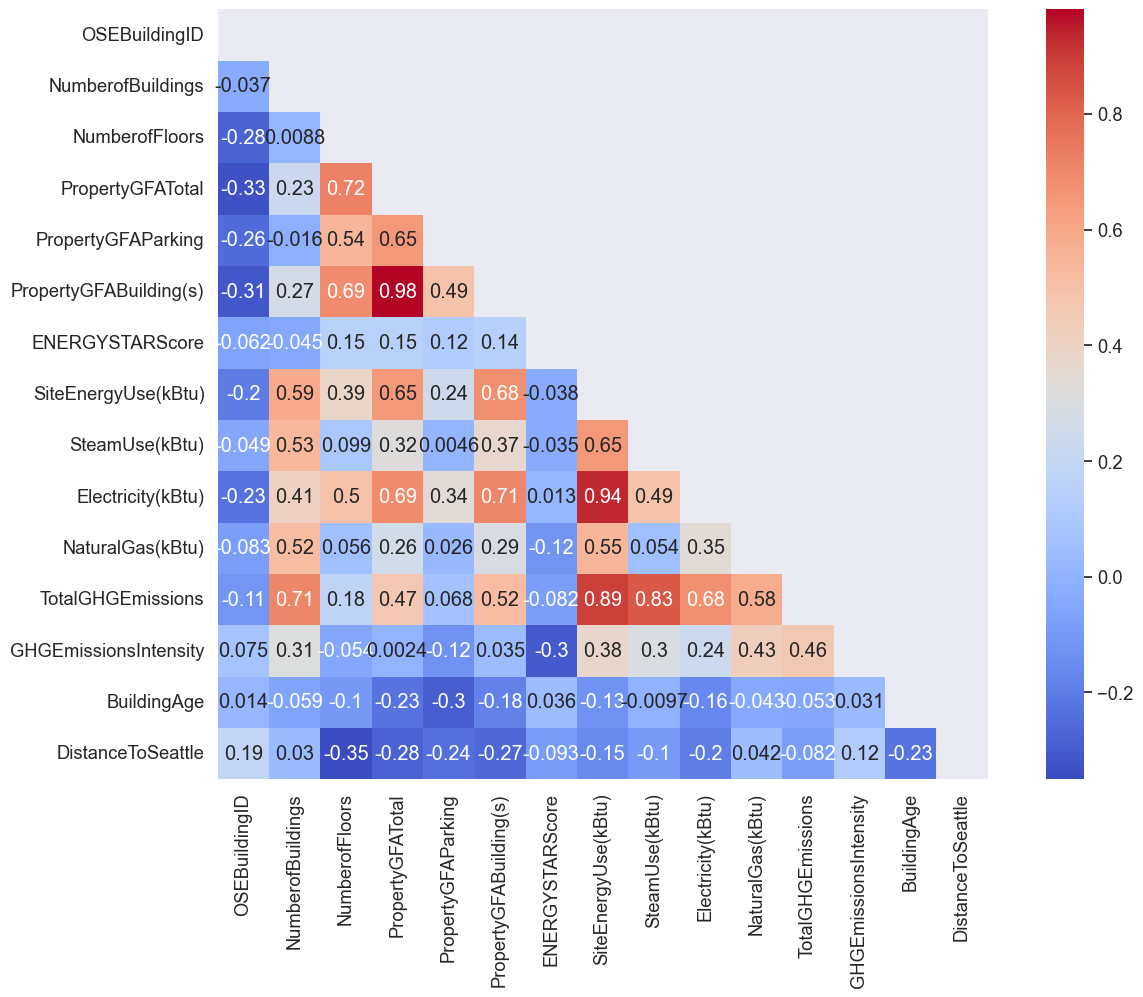

In [ ]:
corr_matrix = df_quantitative.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", square=True)
plt.savefig("my_plot13.JPEG", bbox_inches="tight")
plt.show()


In [ ]:
corr_matrix = df_quantitative.corr()
high_corr_vars = corr_matrix[abs(corr_matrix) > 0.7].unstack().dropna().reset_index()
high_corr_vars = high_corr_vars[high_corr_vars['level_0'] != high_corr_vars['level_1']]
high_corr_vars = high_corr_vars.drop_duplicates(subset=['level_0', 'level_1'])

print(high_corr_vars)


                   level_0                 level_1         0
2        NumberofBuildings       TotalGHGEmissions  0.706513
4           NumberofFloors        PropertyGFATotal  0.723085
5         PropertyGFATotal          NumberofFloors  0.723085
7         PropertyGFATotal  PropertyGFABuilding(s)  0.980286
9   PropertyGFABuilding(s)        PropertyGFATotal  0.980286
11  PropertyGFABuilding(s)       Electricity(kBtu)  0.705739
14     SiteEnergyUse(kBtu)       Electricity(kBtu)  0.937343
15     SiteEnergyUse(kBtu)       TotalGHGEmissions  0.887064
17          SteamUse(kBtu)       TotalGHGEmissions  0.831760
18       Electricity(kBtu)  PropertyGFABuilding(s)  0.705739
19       Electricity(kBtu)     SiteEnergyUse(kBtu)  0.937343
22       TotalGHGEmissions       NumberofBuildings  0.706513
23       TotalGHGEmissions     SiteEnergyUse(kBtu)  0.887064
24       TotalGHGEmissions          SteamUse(kBtu)  0.831760


In [ ]:
#calculer les Score
df['GasScore'] = df['NaturalGas(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['ElectricityScore'] = df['Electricity(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['SteamUse(kBtu)Score'] = df['SteamUse(kBtu)'] / df['SiteEnergyUse(kBtu)']
df['ParkingScore'] = df['PropertyGFAParking'] / df['PropertyGFATotal']
df['BuildingScore'] = df['PropertyGFABuilding(s)'] / df['PropertyGFATotal']

#surface moyenne par bâtiment et par étage
df['NumberofBuildings'] = df['NumberofBuildings'].replace(0,1)
df['NumberofFloors'] = df['NumberofFloors'].replace(0,1)
df['SurfacePerBuilding'] = df['PropertyGFABuilding(s)'] / df['NumberofBuildings']
df['SurfacePerFloor'] = df['PropertyGFABuilding(s)'] / df['NumberofFloors']


In [ ]:
df[(df.SurfacePerBuilding == np.inf) | (df.SurfacePerFloor == np.inf)].head()

Empty DataFrame
Columns: [OSEBuildingID, BuildingType, PrimaryPropertyType, Neighborhood, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, ENERGYSTARScore, SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), TotalGHGEmissions, GHGEmissionsIntensity, BuildingAge, DistanceToSeattle, GasScore, ElectricityScore, SteamUse(kBtu)Score, ParkingScore, BuildingScore, SurfacePerBuilding, SurfacePerFloor]
Index: []

[0 rows x 27 columns]

In [ ]:
df.drop(['NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)','PropertyGFAParking',
         'PropertyGFABuilding(s)','GHGEmissionsIntensity'],
       axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 3347
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              987 non-null    int64  
 1   BuildingType               987 non-null    object 
 2   PrimaryPropertyType        987 non-null    object 
 3   Neighborhood               987 non-null    object 
 4   NumberofBuildings          987 non-null    float64
 5   NumberofFloors             987 non-null    int64  
 6   PropertyGFATotal           987 non-null    int64  
 7   ListOfAllPropertyUseTypes  987 non-null    object 
 8   LargestPropertyUseType     987 non-null    object 
 9   ENERGYSTARScore            987 non-null    float64
 10  SiteEnergyUse(kBtu)        987 non-null    float64
 11  TotalGHGEmissions          987 non-null    float64
 12  BuildingAge                987 non-null    int64  
 13  DistanceToSeattle          987 non-null    float64
 14

In [ ]:
df['ListOfAllPropertyUseTypes'].tolist()

['Hotel',
 'Hotel, Parking, Restaurant',
 'Hotel',
 'Hotel',
 'Hotel, Parking, Swimming Pool',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel',
 'Hotel, Parking',
 'Hotel, Parking',
 'Hotel, Parking',
 'Hotel',
 'Courthouse',
 'Hotel, Parking',
 'Hotel',
 'Hotel',
 'Hotel',
 'K-12 School',
 'Non-Refrigerated Warehouse, Office',
 'Office, Other - Education',
 'K-12 School',
 'Hotel',
 'Data Center, Office, Retail Store',
 'Office, Retail Store',
 'Hotel, Parking, Restaurant',
 'Hotel, Parking, Swimming Pool',
 'Hotel, Parking, Restaurant, Retail Store',
 'Hotel, Other - Entertainment/Public Assembly, Retail Store',
 'Hotel, Parking',
 'Hotel',
 'Hotel',
 'Hotel',
 'K-12 School',
 'Hotel, Parking',
 'Office',
 'Parking, Senior Care Community',
 'Senior Care Community',
 'Hotel, Parking',
 'Medical Office',
 'Hotel',
 'Retail Store',
 'Office, Other, Parking, Retail Store',
 'Hotel, Parking',
 'Office, Other, Parking',
 'Office, Other, Parking',
 'Office, Other, Parking',
 'Hotel, Parkin

In [ ]:
#nous créons une nouvelle colonne nommée "TotalUseTypeNumber" dans le DataFrame df qui contient le nombre de types d'utilisation de propriété pour chaque ligne dans la colonne "ListOfAllPropertyUseTypes".
df['TotalUseTypeNumber'] = df['ListOfAllPropertyUseTypes'].apply(lambda x: len(x.split(',')))
df.drop(["OSEBuildingID", 'BuildingType','ListOfAllPropertyUseTypes'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 3347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     987 non-null    object 
 1   Neighborhood            987 non-null    object 
 2   NumberofBuildings       987 non-null    float64
 3   NumberofFloors          987 non-null    int64  
 4   PropertyGFATotal        987 non-null    int64  
 5   LargestPropertyUseType  987 non-null    object 
 6   ENERGYSTARScore         987 non-null    float64
 7   SiteEnergyUse(kBtu)     987 non-null    float64
 8   TotalGHGEmissions       987 non-null    float64
 9   BuildingAge             987 non-null    int64  
 10  DistanceToSeattle       987 non-null    float64
 11  GasScore                987 non-null    float64
 12  ElectricityScore        987 non-null    float64
 13  SteamUse(kBtu)Score     987 non-null    float64
 14  ParkingScore            987 non-null    float6

In [ ]:
corr_matrix = numerical_features.corr()
high_corr_vars = corr_matrix[abs(corr_matrix) > 0.7].unstack().dropna().reset_index()
high_corr_vars = high_corr_vars[high_corr_vars['level_0'] != high_corr_vars['level_1']]
high_corr_vars = high_corr_vars.drop_duplicates(subset=['level_0', 'level_1'])

print(high_corr_vars)

                   level_0                 level_1         0
2        NumberofBuildings       TotalGHGEmissions  0.706513
4           NumberofFloors        PropertyGFATotal  0.723085
5         PropertyGFATotal          NumberofFloors  0.723085
7         PropertyGFATotal  PropertyGFABuilding(s)  0.980286
9   PropertyGFABuilding(s)        PropertyGFATotal  0.980286
11  PropertyGFABuilding(s)       Electricity(kBtu)  0.705739
14     SiteEnergyUse(kBtu)       Electricity(kBtu)  0.937343
15     SiteEnergyUse(kBtu)       TotalGHGEmissions  0.887064
17          SteamUse(kBtu)       TotalGHGEmissions  0.831760
18       Electricity(kBtu)  PropertyGFABuilding(s)  0.705739
19       Electricity(kBtu)     SiteEnergyUse(kBtu)  0.937343
22       TotalGHGEmissions       NumberofBuildings  0.706513
23       TotalGHGEmissions     SiteEnergyUse(kBtu)  0.887064
24       TotalGHGEmissions          SteamUse(kBtu)  0.831760


In [ ]:
df.to_csv("building_energy_cleaned.csv", index=False)